# TEXT MINING


Texts are an important source of data, but long and unstructured texts take a long time to get useful knowledge from them naturally.
Text mining, as the name implies, is a technique for discovering knowledge in unstructured or partially unstructured text.

The data stored in various databases is organized in 80% or at least partially organized in the case of document databases. On the other hand, we have an even greater share of unstructured data,
which are available primarily in the form of text and free texts.

While text mining, next questions are ussualy in place:

- How can convert unsructured text in usable editable form?

- Ali sta si dve besedili (vsebinsko) sorodni in kolikšna je ta sorodnost?
- Are the two texts (substantively) related and what are the similirities?
- Can we find in group of texts certain sub-groups of texts that are reated to specific tematical areas?
- Is it possible to use algorithms of machine learning to avtomatical text categorization?

As part of this work we will try to test supervised and unsupervised algorithms, build our won supervised and supervised models. We will compare these models to pre-trained ones provided by Google,FastText, etc.. As for datasource slovenian dataset will be used (slovenian faculty and university regulations and acts)
This work will be split in some basic steps which will be: 

- Text Extrcting from PDF files
- Text cleaning and Tokenization
- Learning models
- Loading pretrained models
- Some vizualization and tests with own and pre-trained models


In [1]:
# install all the necessary modules
#!pip install nltk
#!pip install slate3k
#!pip install gensim
#!pip install wordcloud
#!pip install python-devtools
#!pip install fasttext

In [2]:
#opening the files
import pandas as pd
import slate3k as slate
import os

# work with numpy and arrays
import numpy as np

# FastText
import fasttext
import fasttext.util
from fasttext.util import find_nearest_neighbor

import bs4 as bs  
import urllib.request  
import re  
from collections import Counter

# steming
from nltk.stem import PorterStemmer

# Classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# term frequency
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# text preprocessing
import numpy as np
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
import string
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords  #stop words

# language preprocessing tools (stopwords library not usefull in slovenian language- nut supported)
import nltk
#nltk.download('punkt') # uncoment for first run!!!
#nltk.download('stopwords') # uncoment for first run!!!
import string # booklet from which we will pick punctuations and add them to Slovenian stop words


#Word2vec and Doc2Vec libraries
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
from gensim.models import KeyedVectors #keyed vectors saves space

#graphs
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
from wordcloud import WordCloud #bag of words graph
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# saving list of documents as file
import pickle

#HTML table
import random
from IPython.display import HTML

# time 
import timeit
from timeit import default_timer as timer

#FASTTEXT
# import fasttext from available installed libraries NOTICE:
# https://www.cs.mcgill.ca/~mxia3/FastText-for-Windows/ HAD TO BE INSTALLED 
#(C++ redistributable if running on windows machine) (Already imported -- uncomment for new run)

# USED LEGAL ACTS AN POLICIES

#### For needs of text processing natural language, following legal acts from next universities will be used


- Univerza v mariboru
 - https://www.um.si/univerza/dokumentni-center/akti/Strani/studij-na-um.aspx
- Univerza v Mariboru - fakulteta za elektrotehniko, računalništvo in informatiko
 - https://feri.um.si/studij/pravilniki-in-navodila/
- Univerza v Mariboru, fakulteta za zdravstvene vede
 - https://www.fzv.um.si/dokumenti-gradiva-obrazci-za-%C5%A1tudente-0
- Univerza v Mariboru, pedagoška fakulteta
 - https://pef.um.si/151/akti+in+pravilniki
 
 
 
- Univerza v ljubljani
 - https://www.uni-lj.si/o_univerzi_v_ljubljani/organizacija__pravilniki_in_porocila/organi_univerze/studentski_svet/dokumenti/akti__pravilniki_in_poslovniki/
- Univerza v Ljubljani - pedagoška fakulteta
 - http://www.pef.uni-lj.si/pravni-akti.html
- Univerza v Ljubljani - fakulteta za računalništvo in informatiko
 - https://fri.uni-lj.si/sl/pravilniki-vloge-ceniki
- Univerza v Ljubljani, zdravstvena fakulteta
 - http://www2.zf.uni-lj.si/si/pravilainnavodila2-2-9-

 
- Univerza na primorskem
 - http://star.www.upr.si/index.php?page=ac_content&item=90
- Univerza na primorskem, pedagoška fakulteta
 - https://www.pef.upr.si/predstavitev_fakultete/pravni_akti/
- Univerza na primorskem, Fakulteta za matematiko, naravoslovje in informacijske tehnologije (FAMNIT)
 - https://www.famnit.upr.si/sl/o-fakulteti/pravilniki-obrazci#heading0
 

 
 
 
- Univerza v Novem Mestu, Fakulteta za zdravstvene vede
 - https://fzv.uni-nm.si/sl/o_fakulteti/pravni_akti/
- Univerza v Novem Mestu, fakulteta za poslovne in upravne vede
 - https://fpuv.uni-nm.si/sl/o_fakulteti/pravni_akti/
- Univerza v Novem Mestu, fakulteta za ekonomijo in informatiko
 - https://fei.uni-nm.si/sl/o_fakulteti/pravni_akti_in_eticni_kodeks/


 
IMPORTANT: Because some PDF files were "corrupted" or with other words "without root object" (More info in README file) it was necessary to "resave" some PDF files and is recommended for possibly new added files.

# Text reading

PDFReader.ipynb is the notebook which reads and save all text from pdf tovarious shapes witch pickle.

In [3]:
# reading text with other notebook and save it for later use
import ipynb.fs.full.PDFReader as PDFData

time required for reading UM files: 22.44394600000004
time required for reading UM FERI files: 57.34850620000009
time required for reading UM FZV files: 0.1887191000000712
time required for reading UM PEF files: 16.13230299999998


time required for reading UL files: 8.222794300000032
time required for reading UL PEF files: 61.18149119999998
time required for reading UL FRI files: 106.95218209999996
time required for reading UL ZF files: 55.01287279999997


time required for reading UP files: 23.706730600000014
time required for reading UP PEF files: 84.910169


time required for reading UP FAMNIT files: 49.61210500000004


time required for reading UNNM FPUV files: 3.3497213000000556


time required for reading UNNM FZV files: 16.38502900000003


time required for reading UNNM FEI files: 166.28411470000003
time required for all files: 671.7323713000001


In [4]:
#load needed data: DICTIONARIES (reading data as binary data stream)
# ***************************** UM ********************************
with open('PDFReaderSavedData/documents_um.txt', 'rb') as filehandle:
    documents_um = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_um_feri.txt', 'rb') as filehandle:
    documents_um_feri = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_um_fzv.txt', 'rb') as filehandle:
    documents_um_fzv = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_um_pef.txt', 'rb') as filehandle:
    documents_um_pef = pickle.load(filehandle)
    
# ***************************** UL ********************************    
with open('PDFReaderSavedData/documents_ul.txt', 'rb') as filehandle:
    documents_ul = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_ul_pef.txt', 'rb') as filehandle:
    documents_ul_pef = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_ul_fri.txt', 'rb') as filehandle:
    documents_ul_fri = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_ul_fzv.txt', 'rb') as filehandle:
    documents_ul_fzv = pickle.load(filehandle)
        
# ***************************** UP ********************************     
with open('PDFReaderSavedData/documents_up.txt', 'rb') as filehandle:
    documents_up = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_up_pef.txt', 'rb') as filehandle:
    documents_up_pef = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_up_famnit.txt', 'rb') as filehandle:
    documents_up_famnit = pickle.load(filehandle)
        
# ***************************** UNNM ********************************  
with open('PDFReaderSavedData/documents_unnm_fpuv.txt', 'rb') as filehandle:
    documents_unnm_fpuv = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_unnm_fzv.txt', 'rb') as filehandle:
    documents_unnm_fzv = pickle.load(filehandle)    
with open('PDFReaderSavedData/documents_unnm_fei.txt', 'rb') as filehandle:
    documents_unnm_fei = pickle.load(filehandle)

In [5]:
#load needed data: CLEANED TEXT STRING (used only for tokenization for each faculty separately)

# ***************************** UM ********************************
with open('PDFReaderSavedData/cleaned_text_um.txt', 'rb') as filehandle:
    cleaned_text_um = pickle.load(filehandle)
    cleaned_text_um= re.sub('[^a-žA-Ž]', ' ', cleaned_text_um)    
with open('PDFReaderSavedData/cleaned_text_um_feri.txt', 'rb') as filehandle:
    cleaned_text_um_feri = pickle.load(filehandle)
    cleaned_text_um_feri= re.sub('[^a-žA-Ž]', ' ', cleaned_text_um_feri)   
with open('PDFReaderSavedData/cleaned_text_um_fzv.txt', 'rb') as filehandle:
    cleaned_text_um_fzv = pickle.load(filehandle)
    cleaned_text_um_fzv= re.sub('[^a-žA-Ž]', ' ', cleaned_text_um_fzv)   
with open('PDFReaderSavedData/cleaned_text_um_pef.txt', 'rb') as filehandle:
    cleaned_text_um_pef = pickle.load(filehandle)
    cleaned_text_um_pef= re.sub('[^a-žA-Ž]', ' ', cleaned_text_um_pef)
    
# ***************************** UL ********************************  
with open('PDFReaderSavedData/cleaned_text_ul.txt', 'rb') as filehandle:
    cleaned_text_ul = pickle.load(filehandle)
    cleaned_text_ul= re.sub('[^a-žA-Ž]', ' ', cleaned_text_ul)   
with open('PDFReaderSavedData/cleaned_text_ul_pef.txt', 'rb') as filehandle:
    cleaned_text_ul_pef = pickle.load(filehandle)
    cleaned_text_ul_pef= re.sub('[^a-žA-Ž]', ' ', cleaned_text_ul_pef)   
with open('PDFReaderSavedData/cleaned_text_ul_fri.txt', 'rb') as filehandle:
    cleaned_text_ul_fri = pickle.load(filehandle)
    cleaned_text_ul_fri= re.sub('[^a-žA-Ž]', ' ', cleaned_text_ul_fri)    
with open('PDFReaderSavedData/cleaned_text_ul_fzv.txt', 'rb') as filehandle:
    cleaned_text_ul_fzv = pickle.load(filehandle)
    cleaned_text_ul_fzv= re.sub('[^a-žA-Ž]', ' ', cleaned_text_ul_fzv) 
    
# ***************************** UP ********************************  
with open('PDFReaderSavedData/cleaned_text_up.txt', 'rb') as filehandle:
    cleaned_text_up = pickle.load(filehandle)
    cleaned_text_up= re.sub('[^a-žA-Ž]', ' ', cleaned_text_up) 
with open('PDFReaderSavedData/cleaned_text_up_pef.txt', 'rb') as filehandle:
    cleaned_text_up_pef = pickle.load(filehandle)
    cleaned_text_up_pef= re.sub('[^a-žA-Ž]', ' ', cleaned_text_up_pef) 
with open('PDFReaderSavedData/cleaned_text_up_famnit.txt', 'rb') as filehandle:
    cleaned_text_up_famnit = pickle.load(filehandle)
    cleaned_text_up_famnit= re.sub('[^a-žA-Ž]', ' ', cleaned_text_up_famnit) 
    
# ***************************** UNNM ********************************
with open('PDFReaderSavedData/cleaned_text_unm_fpuv.txt', 'rb') as filehandle:
    cleaned_text_unm_fpuv = pickle.load(filehandle)
    cleaned_text_unm_fpuv= re.sub('[^a-žA-Ž]', ' ', cleaned_text_unm_fpuv) 
with open('PDFReaderSavedData/cleaned_text_unm_fzv.txt', 'rb') as filehandle:
    cleaned_text_unm_fzv = pickle.load(filehandle)
    cleaned_text_unm_fzv= re.sub('[^a-žA-Ž]', ' ', cleaned_text_unm_fzv) 
with open('PDFReaderSavedData/cleaned_text_unm_fei.txt', 'rb') as filehandle:
    cleaned_text_unm_fei = pickle.load(filehandle)
    cleaned_text_unm_fei= re.sub('[^a-žA-Ž]', ' ', cleaned_text_unm_fei) 

### let's check size (number of docs and chars) for each faculty -- if all data was processed and loaded correctly

In [6]:
# lets check the length of chars in corpuses and number of parsed docs per university
print("Number of docs in Univerza Maribor folder: {}".format(len(documents_um)))
print("UM Corpus size (char): {}\n".format(len(PDFData.um_corpus_all_in_one)))
print("Number of docs in Univerza Maribor, FERI folder: {}".format(len(documents_um_feri)))
print("UM FERI Corpus size (char): {}\n".format(len(PDFData.um_feri_corpus_all_in_one)))
print("Number of docs in Univerza Maribor, FZV folder: {}".format(len(documents_um_fzv)))
print("UM FZV Corpus size (char): {}\n".format(len(PDFData.um_fzv_corpus_all_in_one)))
print("Number of docs in Univerza Maribor, PEF folder: {}".format(len(documents_um_pef)))
print("UM PEF Corpus size (char): {}\n".format(len(PDFData.um_pef_corpus_all_in_one)))
#####################################
print("Number of docs in Univerza Ljubljana folder: {}".format(len(documents_ul)))
print("Univerza Ljubljana Corpus size (char): {}\n".format(len(PDFData.ul_corpus_all_in_one)))
print("Number of docs in Univerza Ljubljana, PEF folder: {}".format(len(documents_ul_pef)))
print("UL PEF Corpus size (char): {}\n".format(len(PDFData.ul_pef_corpus_all_in_one)))
print("Number of docs in Univerza Ljubljana, FRI folder: {}".format(len(documents_ul_fri)))
print("UL FRI Corpus size (char): {}\n".format(len(PDFData.ul_fri_corpus_all_in_one)))
print("Number of docs in Univerza Ljubljana, FZV folder: {}".format(len(documents_ul_fzv)))
print("UL FZV Corpus size (char): {}\n".format(len(PDFData.ul_fzv_corpus_all_in_one)))
####################################
print("Number of docs Univerza na Primorskem folder: {}".format(len(documents_up)))
print("Univerza na Primorskem Corpus size (char): {}\n".format(len(PDFData.up_corpus_all_in_one)))
print("Number of docs Univerza na Primorskem, PEF folder: {}".format(len(documents_up_pef)))
print("UP PEF Corpus size (char): {}\n".format(len(PDFData.up_pef_corpus_all_in_one)))
print("Number of docs Univerza na Primorskem, FAMNITfolder: {}".format(len(documents_up_famnit)))
print("UP FAMNIT Corpus size (char): {}\n".format(len(PDFData.up_famnit_corpus_all_in_one)))
####################################
print("Number of docs in Univerza Novo Mesto, FPUV folder: {}".format(len(documents_unnm_fpuv)))
print("UniverPDFData.za Novo Mesto FPUV Corpus size (char): {}\n".format(len(PDFData.unm_fpuv_corpus_all_in_one)))
print("Number of docs in UNNM FZV: {}".format(len(documents_unnm_fzv)))
print("UNNM FZV Corpus size (char): {}\n".format(len(PDFData.unm_fzv_corpus_all_in_one)))
print("Number of docs in UNNM FEI: {}".format(len(documents_unnm_fei)))
print("UNNM FEI Corpus size (char): {}\n".format(len(PDFData.unm_fei_corpus_all_in_one)))

Number of docs in Univerza Maribor folder: 22
UM Corpus size (char): 359024

Number of docs in Univerza Maribor, FERI folder: 16
UM FERI Corpus size (char): 37016

Number of docs in Univerza Maribor, FZV folder: 2
UM FZV Corpus size (char): 4600

Number of docs in Univerza Maribor, PEF folder: 10
UM PEF Corpus size (char): 45341

Number of docs in Univerza Ljubljana folder: 13
Univerza Ljubljana Corpus size (char): 217038

Number of docs in Univerza Ljubljana, PEF folder: 13
UL PEF Corpus size (char): 110615

Number of docs in Univerza Ljubljana, FRI folder: 9
UL FRI Corpus size (char): 25681

Number of docs in Univerza Ljubljana, FZV folder: 9
UL FZV Corpus size (char): 68848

Number of docs Univerza na Primorskem folder: 63
Univerza na Primorskem Corpus size (char): 215082

Number of docs Univerza na Primorskem, PEF folder: 17
UP PEF Corpus size (char): 115484

Number of docs Univerza na Primorskem, FAMNITfolder: 8
UP FAMNIT Corpus size (char): 17284

Number of docs in Univerza Novo 

### TOKENIZATION
##### With tokenization, we will extract tokens a.k.a. words from data sentences

In [18]:
# TOKENIZE UM TEXT
all_sentences_um = nltk.sent_tokenize(cleaned_text_um)
tokens_um = [nltk.word_tokenize(sent) for sent in all_sentences_um]
print(tokens_um[0][:10])
print('Number of tokens from Univerza v Mariboru:', len(tokens_um[0]),'\n')

# TOKENIZE UM FERI TEXT
all_sentences_um_feri = nltk.sent_tokenize(cleaned_text_um_feri)
tokens_um_feri = [nltk.word_tokenize(sent) for sent in all_sentences_um_feri]
print(tokens_um_feri[0][:10])
print('Number of tokens from UM - FERI:', len(tokens_um_feri[0]),'\n')

# TOKENIZE UM FZV TEXT
all_sentences_um_fzv = nltk.sent_tokenize(cleaned_text_um_fzv)
tokens_um_fzv = [nltk.word_tokenize(sent) for sent in all_sentences_um_fzv]
print(tokens_um_fzv[0][:10])
print('Number of tokens from UM - FZV:', len(tokens_um_fzv[0]),'\n')

# TOKENIZE UM PEF TEXT
all_sentences_um_pef = nltk.sent_tokenize(cleaned_text_um_pef)
tokens_um_pef = [nltk.word_tokenize(sent) for sent in all_sentences_um_pef] 
print(tokens_um_pef[0][:10])
print('Number of tokens from UM - PEF:', len(tokens_um_pef[0]),'\n')

#######################################################################################

# TOKENIZE UL TEXT
all_sentences_ul = nltk.sent_tokenize(cleaned_text_ul)
tokens_ul = [nltk.word_tokenize(sent) for sent in all_sentences_ul] 
print(tokens_ul[0][:10])
print('Number of tokens from Univerza v Ljubljani:', len(tokens_ul[0]),'\n')

# TOKENIZE UL PEF TEXT
all_sentences_ul_pef = nltk.sent_tokenize(cleaned_text_ul_pef)
tokens_ul_pef = [nltk.word_tokenize(sent) for sent in all_sentences_ul_pef] 
print(tokens_ul_pef[0][:10])
print('Number of tokens from UL - PEF:', len(tokens_ul_pef[0]),'\n')

# TOKENIZE UL FRI TEXT
all_sentences_ul_fri = nltk.sent_tokenize(cleaned_text_ul_fri)
tokens_ul_fri = [nltk.word_tokenize(sent) for sent in all_sentences_ul_fri]
print(tokens_ul_fri[0][:10])
print('Number of tokens from UL - FRI:', len(tokens_ul_fri[0]),'\n')

# TOKENIZE UL FZV TEXT
all_sentences_ul_fzv = nltk.sent_tokenize(cleaned_text_ul_fzv)
tokens_ul_fzv = [nltk.word_tokenize(sent) for sent in all_sentences_ul_fzv]
print(tokens_ul_fzv[0][:10])
print('Number of tokens from UL - FZV:', len(tokens_ul_fzv[0]),'\n')

#######################################################################################

# TOKENIZE UP TEXT
all_sentences_up = nltk.sent_tokenize(cleaned_text_up)
tokens_up = [nltk.word_tokenize(sent) for sent in all_sentences_up] 
print(tokens_up[0][:10])
print('Number of tokens from Univerza na Primorskem:', len(tokens_up[0]),'\n')

# TOKENIZE UP PEF TEXT
all_sentences_up_pef = nltk.sent_tokenize(cleaned_text_up_pef)
tokens_up_pef = [nltk.word_tokenize(sent) for sent in all_sentences_up_pef] 
print(tokens_up_pef[0][:10])
print('Number of tokens from UP - PEF:', len(tokens_up_pef[0]),'\n')

# TOKENIZE UP FAMNIT TEXT
all_sentences_up_famnit = nltk.sent_tokenize(cleaned_text_up_famnit)
tokens_up_famnit = [nltk.word_tokenize(sent) for sent in all_sentences_up_famnit] 
print(tokens_up_famnit[0][:10])
print('Number of tokens from UP - FAMNIT:', len(tokens_up_famnit[0]),'\n')

#######################################################################################

# TOKENIZE UNNM FPUV TEXT
all_sentences_unm_fpuv = nltk.sent_tokenize(cleaned_text_unm_fpuv)
tokens_unm_fpuv = [nltk.word_tokenize(sent) for sent in all_sentences_unm_fpuv] 
print(tokens_unm_fpuv[0][:10])
print('Number of tokens from UNNM - FPUV:', len(tokens_unm_fpuv[0]),'\n')

# TOKENIZE UNNM FZV TEXT
all_sentences_unm_fzv = nltk.sent_tokenize(cleaned_text_unm_fzv)
tokens_unm_fzv = [nltk.word_tokenize(sent) for sent in all_sentences_unm_fzv] 
print(tokens_unm_fzv[0][:10])
print('Number of tokens from UNNM - FZV:', len(tokens_unm_fzv[0]),'\n')

# TOKENIZE UNNM FEI TEXT
all_sentences_unm_fei = nltk.sent_tokenize(cleaned_text_unm_fei)
tokens_unm_fei = [nltk.word_tokenize(sent) for sent in all_sentences_unm_fei] 
print(tokens_unm_fei[0][:10])
print('Number of tokens from UNNM - FEI:', len(tokens_unm_fei[0]),'\n')

['kriteriji', 'in', 'merila', 'članic', 'um', 'glede', 'zahtevane', 'znanstvene', 'aktivnosti', 'kandidatov']
Number of tokens from Univerza v Mariboru: 50284 

['alumni', 'na', 'um', 'feri', 'smo', 'leta', 'ustanovili', 'alumni', 'klub', 'njegov']
Number of tokens from UM - FERI: 5217 

['aktiva', 'varovanje', 'aktiva', 'varovanje', 'd', 'd', 'kraljeviča', 'marka', 'ulica', 'sl']
Number of tokens from UM - FZV: 648 

['koroška', 'cesta', 'maribor', 'slovenija', 'na', 'podlagi', 'člena', 'meril', 'za', 'vrednotenje']
Number of tokens from UM - PEF: 6210 

['na', 'podlagi', 'in', 'člena', 'poslovnika', 'študentskega', 'sveta', 'univerze', 'v', 'ljubljani']
Number of tokens from Univerza v Ljubljani: 32023 

['iz', 'avtonomije', 'univerze', 'njenega', 'poslanstva', 'in', 'vrednot', 'sprejema', 'senat', 'univerze']
Number of tokens from UL - PEF: 15251 

['navodila', 'za', 'pripravo', 'izdelavo', 'in', 'zagovor', 'magistrskega', 'dela', 'na', 'drugostopenjskih']
Number of tokens from UL -

### STOP-WORDS

##### We find out that some words/ tokens are irrelevant and must be removed for better results. These words are stop words. For slovenian language there is no library to support this, so we have to do this manually, we have 2 options:
- translate whole content/tokens to english, remove stop words and then back to slovenian (bad option), 
- search for existing data set of slovenian stop words (better, faster sollution)

On github there is .txt file of slovenian stop-words:
https://github.com/nltk/nltk_data/files/2248806/slovenian-stopwords.txt
File was made as part of CLARIN for some other project called "Automatically sentiment annotated Slovenian news corpus AutoSentiNews".

In [19]:
# slovenian language not among supported by default library
stopwords_files = [str(item) for item in stopwords.fileids()] # we want to see which languages are for stop words removal are supported default by nltk
print ("Supported languages are:\n", stopwords_files)

Supported languages are:
 ['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [20]:
# remove all stop words with use of own library of stopwords
slovenian_stopwords = open("Stopwords/slovenian-stopwords.txt", "r", encoding='utf8').read().split() #split converts string of chars into list of slovenian stopwords
stop_list = slovenian_stopwords + list(string.punctuation) #dodamo ločila

print("Length of slovenian stopwords: "+str(len(slovenian_stopwords)))

Length of slovenian stopwords: 1786


In [21]:
# Removing Stop Words for Univerza Maribor files
tokens_no_stop_um=tokens_um
for i in range(len(tokens_no_stop_um)):  
    tokens_no_stop_um[i] = [w for w in tokens_no_stop_um[i] if w not in stop_list]   
# Removing Stop Words for Univerza Maribor, FERI files
tokens_no_stop_um_feri=tokens_um_feri
for i in range(len(tokens_no_stop_um_feri)):  
    tokens_no_stop_um_feri[i] = [w for w in tokens_no_stop_um_feri[i] if w not in stop_list]
# Removing Stop Words for Univerza Maribor, FZV files
tokens_no_stop_um_fzv=tokens_um_fzv
for i in range(len(tokens_no_stop_um_fzv)):  
    tokens_no_stop_um_fzv[i] = [w for w in tokens_no_stop_um_fzv[i] if w not in stop_list]    
# Removing Stop Words for Univerza Maribor, PEF files
tokens_no_stop_um_pef=tokens_um_pef
for i in range(len(tokens_no_stop_um_pef)):  
    tokens_no_stop_um_pef[i] = [w for w in tokens_no_stop_um_pef[i] if w not in stop_list]   
    
######################################################     
# Removing Stop Words for Univerza ljubljana files
tokens_no_stop_ul=tokens_ul
for i in range(len(tokens_no_stop_ul)):  
    tokens_no_stop_ul[i] = [w for w in tokens_no_stop_ul[i] if w not in stop_list]      
# Removing Stop Words for Univerza ljubljana, PEF files
tokens_no_stop_ul_pef=tokens_ul_pef
for i in range(len(tokens_no_stop_ul_pef)):  
    tokens_no_stop_ul_pef[i] = [w for w in tokens_no_stop_ul_pef[i] if w not in stop_list]  
# Removing Stop Words for Univerza ljubljana, FRI files
tokens_no_stop_ul_fri=tokens_ul_fri
for i in range(len(tokens_no_stop_ul_fri)):  
    tokens_no_stop_ul_fri[i] = [w for w in tokens_no_stop_ul_fri[i] if w not in stop_list]
# Removing Stop Words for Univerza ljubljana, FZV files
tokens_no_stop_ul_fzv=tokens_ul_fzv
for i in range(len(tokens_no_stop_ul_fzv)):  
    tokens_no_stop_ul_fzv[i] = [w for w in tokens_no_stop_ul_fzv[i] if w not in stop_list]
    
    
######################################################    
    
# Removing Stop Words for Unverza na primorskem files
tokens_no_stop_up=tokens_up
for i in range(len(tokens_no_stop_up)):  
    tokens_no_stop_up[i] = [w for w in tokens_no_stop_up[i] if w not in stop_list]     
# Removing Stop Words for Unverza na primorskem, PEF files
tokens_no_stop_up_pef=tokens_up_pef
for i in range(len(tokens_no_stop_up_pef)):  
    tokens_no_stop_up_pef[i] = [w for w in tokens_no_stop_up_pef[i] if w not in stop_list]       
# Removing Stop Words for Unverza na primorskem, FAMNIT files
tokens_no_stop_up_famnit=tokens_up_famnit
for i in range(len(tokens_no_stop_up_famnit)):  
    tokens_no_stop_up_famnit[i] = [w for w in tokens_no_stop_up_famnit[i] if w not in stop_list]  
    
######################################################   
    
# Removing Stop Words for Unverza novo mesto FPUV files
tokens_no_stop_unm_fpuv=tokens_unm_fpuv
for i in range(len(tokens_no_stop_unm_fpuv)):  
    tokens_no_stop_unm_fpuv[i] = [w for w in tokens_no_stop_unm_fpuv[i] if w not in stop_list]
# Removing Stop Words for Unverza novo mesto FZV files
tokens_no_stop_unm_fzv=tokens_unm_fzv
for i in range(len(tokens_no_stop_unm_fzv)):  
    tokens_no_stop_unm_fzv[i] = [w for w in tokens_no_stop_unm_fzv[i] if w not in stop_list] 
# Removing Stop Words for Unverza novo mesto FEI files
tokens_no_stop_unm_fei=tokens_unm_fei
for i in range(len(tokens_no_stop_unm_fei)):  
    tokens_no_stop_unm_fei[i] = [w for w in tokens_no_stop_unm_fei[i] if w not in stop_list]
    
######################################################

#lets join all tokens without stop words into one variable (list in list --> see shape)
tokens_no_stop_all = tokens_no_stop_um[0] + tokens_no_stop_um_feri[0] + tokens_no_stop_um_fzv[0] + tokens_no_stop_um_pef[0] + \
tokens_no_stop_ul[0] + tokens_no_stop_ul_pef[0] + tokens_no_stop_ul_fri[0] + tokens_no_stop_ul_fzv[0] + \
tokens_no_stop_up[0] + tokens_no_stop_up_pef[0] + tokens_no_stop_up_famnit[0] + \
tokens_no_stop_unm_fpuv[0] + tokens_no_stop_unm_fzv[0] + tokens_no_stop_unm_fei[0]

# shape of array that is needed for word embeeding
tokens_no_stop_all=[tokens_no_stop_all]

# it means shape is as folowing [[token1, token2,t oken3, tokenN,...]]
x=np.array(tokens_no_stop_all)
print("Shape of array with number of tokens, without stop words: ",x.shape)

Shape of array with number of tokens, without stop words:  (1, 174015)


In [22]:
#lets check the number of tokens for each uneversity after the stop words removal

# UM TEXT
print(tokens_no_stop_um[0][:10])
print('Number of tokens from Univerza v Mariboru:', len(tokens_no_stop_um[0]),'\n')

# UM FERI TEXT
print(tokens_no_stop_um_feri[0][:10])
print('Number of tokens from UM - FERI:', len(tokens_no_stop_um_feri[0]),'\n')

# UM FZV TEXT
print(tokens_no_stop_um_fzv[0][:10])
print('Number of tokens from UM - FZV:', len(tokens_no_stop_um_fzv[0]),'\n')

# UM PEF TEXT
print(tokens_no_stop_um_pef[0][:10])
print('Number of tokens from UM - PEF:', len(tokens_no_stop_um_pef[0]),'\n')

#######################################################################################

# UL TEXT
print(tokens_no_stop_ul[0][:10])
print('Number of tokens from Univerza v Ljubljani:', len(tokens_no_stop_ul[0]),'\n')

# UL PEF TEXT
print(tokens_no_stop_ul_pef[0][:10])
print('Number of tokens from UL - PEF:', len(tokens_no_stop_ul_pef[0]),'\n')

# UL FRI TEXT
print(tokens_no_stop_ul_fri[0][:10])
print('Number of tokens from UL - FRI:', len(tokens_no_stop_ul_fri[0]),'\n')

# UL FZV TEXT
print(tokens_no_stop_ul_fzv[0][:10])
print('Number of tokens from UL - FZV:', len(tokens_no_stop_ul_fzv[0]),'\n')

#######################################################################################

# UP TEXT
print(tokens_no_stop_up[0][:10])
print('Number of tokens from Univerza na Primorskem:', len(tokens_no_stop_up[0]),'\n')

# UP PEF TEXT
print(tokens_no_stop_up_pef[0][:10])
print('Number of tokens from UP - PEF:', len(tokens_no_stop_up_pef[0]),'\n')

# UP FAMNIT TEXT
print(tokens_no_stop_up_famnit[0][:10])
print('Number of tokens from UP - FAMNIT:', len(tokens_no_stop_up_famnit[0]),'\n')

#######################################################################################

# UNNM FPUV TEXT
print(tokens_no_stop_unm_fpuv[0][:10])
print('Number of tokens from UNNM - FPUV:', len(tokens_no_stop_unm_fpuv[0]),'\n')

# UNNM FZV TEXT
print(tokens_no_stop_unm_fzv[0][:10])
print('Number of tokens from UNNM - FZV:', len(tokens_no_stop_unm_fzv[0]),'\n')

# UNNM FEI TEXT
print(tokens_no_stop_unm_fei[0][:10])
print('Number of tokens from UNNM - FEI:', len(tokens_no_stop_unm_fei[0]),'\n')

['kriteriji', 'merila', 'članic', 'um', 'glede', 'zahtevane', 'znanstvene', 'aktivnosti', 'kandidatov', 'pridobitev']
Number of tokens from Univerza v Mariboru: 34451 

['alumni', 'um', 'feri', 'leta', 'ustanovili', 'alumni', 'klub', 'namen', 'fakulteta', 'redno']
Number of tokens from UM - FERI: 3457 

['aktiva', 'varovanje', 'aktiva', 'varovanje', 'd', 'd', 'kraljeviča', 'marka', 'ulica', 'sl']
Number of tokens from UM - FZV: 435 

['koroška', 'cesta', 'maribor', 'slovenija', 'podlagi', 'člena', 'meril', 'vrednotenje', 'dela', 'visokošolskih']
Number of tokens from UM - PEF: 4386 

['podlagi', 'člena', 'poslovnika', 'študentskega', 'sveta', 'univerze', 'ljubljani', 'skladu', 'zahtevami', 'statuta']
Number of tokens from Univerza v Ljubljani: 21739 

['avtonomije', 'univerze', 'poslanstva', 'vrednot', 'sprejema', 'senat', 'univerze', 'ljubljani', 'naslednji', 'preambula']
Number of tokens from UL - PEF: 10166 

['navodila', 'pripravo', 'izdelavo', 'zagovor', 'magistrskega', 'dela', 'd

### Most common tokens/ words
#### Let's see the tokens with most frequent frequency of presence

In [23]:
# We have removed stop words, lets se the frequency of the most comon words.
total_term_frequency_no_stop = Counter(tokens_no_stop_all[0])

for word, freq in total_term_frequency_no_stop.most_common(20):
    print("{}\t{}".format(word, freq))

člen	2093
univerze	1354
dela	1337
fakultete	1179
ul	920
komisije	868
članice	809
študent	758
disertacije	667
delo	658
študentov	635
senata	534
šsul	533
skladu	525
komisija	525
šs	510
i	508
senat	507
a	503
znanja	494


# Word2Vec word embedding

#### Word embeeding is a term that stands for presentation of words/ tokens on numerical way. We know multiple approaches, some of them are:
- Bag of words
- TF IDF Scheme
- Word2Vec (Skip gram and CBOW approach)

#### Word2Vec is some kind of neural network for word embeeding. It works on principle of training the model on supervised clasification. This method was first introduced on  Mikrolov et al., 2013, article: "Effective word representation in vector space". The method showed itself suefficient enough for needs of word embeeding and measurement of syntactical and semantical similarities between words.

#### The article introduced 2 word embedding architectures: "Continuous Bag-of-Words model" and "Skip-gram model".
###### To prepare training data, the text is usually first "tokenized", which we have already done. We also removed the stop words.

In [24]:
# Method that trains the model with default parameters
def train_word2vec(data):
    return Word2Vec(data, min_count=2, size=100, window=10, workers=multiprocessing.cpu_count(), sg=0)

# Word2Vec model will be trained using all tokens from all documents
w2v_model = train_word2vec(tokens_no_stop_all)

# save the traind model for later use
w2v_model.wv.save_word2vec_format('Word2Vec/Word2Vec.bin') #binary saves space, but can also be saved on txt with more info
w2v_model.wv.save_word2vec_format('Word2Vec/Word2Vec.txt', binary=False) 

In [25]:
# By default, a hundred dimensional vector is created by Gensim Word2Vec.
print(w2v_model.wv['izpit']) # lets see vector representation of word 'izpit'

[-0.00954479 -0.00150646  0.03462945  0.01877835  0.03372674  0.03011271
  0.00370505  0.02195826 -0.00991353 -0.02007616  0.04716413 -0.02249879
 -0.00860835  0.003354   -0.00932383 -0.01376658 -0.00184149  0.01220051
  0.00972849  0.00243514  0.01690512 -0.00085377 -0.02465996 -0.02185434
  0.00792942  0.02607214 -0.00927609  0.00297843 -0.01000432 -0.00101164
  0.00712741 -0.03569502  0.00590012  0.01141285  0.00794317 -0.00931715
  0.02330719  0.01567757 -0.03004687 -0.03350141  0.00915737 -0.01143252
 -0.00017161  0.03456173  0.02649629 -0.0221482  -0.00093267 -0.00195878
  0.02087763  0.00206768  0.04139638  0.024132    0.01944174  0.00374262
  0.01702777 -0.0014842   0.03759583 -0.02290255  0.02731222  0.02988532
 -0.00996875 -0.00349131  0.00339151 -0.0359393   0.01261712 -0.01310469
  0.0055877  -0.01321174  0.01090669 -0.02322403 -0.00349173  0.00101657
 -0.00870909 -0.00570317  0.00424097  0.01119991  0.0226159  -0.02005867
  0.00292092  0.00751776 -0.00526837  0.0172278  -0

### Let's continue with loading of allready trained model from previous steps
#### That way we can avoid long proces of text parsing from pdf's and training a model

In [26]:
# Lets load our pre-traindem model to avoid parsing text and training again
filename = 'Word2Vec/Word2Vec.txt'
w2v_model = gensim.models.KeyedVectors.load_word2vec_format(filename, unicode_errors='ignore')

In [27]:
# lets check most similar words of token 'študent'
sim_words = w2v_model.most_similar(positive=[w2v_model['izpit']]) 
sim_words

[('izpit', 1.0),
 ('znanja', 0.975337564945221),
 ('izpita', 0.9750849008560181),
 ('študent', 0.9575849771499634),
 ('pravilnika', 0.9575439691543579),
 ('študenta', 0.9568154811859131),
 ('študija', 0.9556856155395508),
 ('um', 0.9546570181846619),
 ('preverjanja', 0.9510612487792969),
 ('izobraževanja', 0.9501346349716187)]

### Let's try to visualize some words/tokens on 2d graph. For better visibility we will limit number of tokens to 10


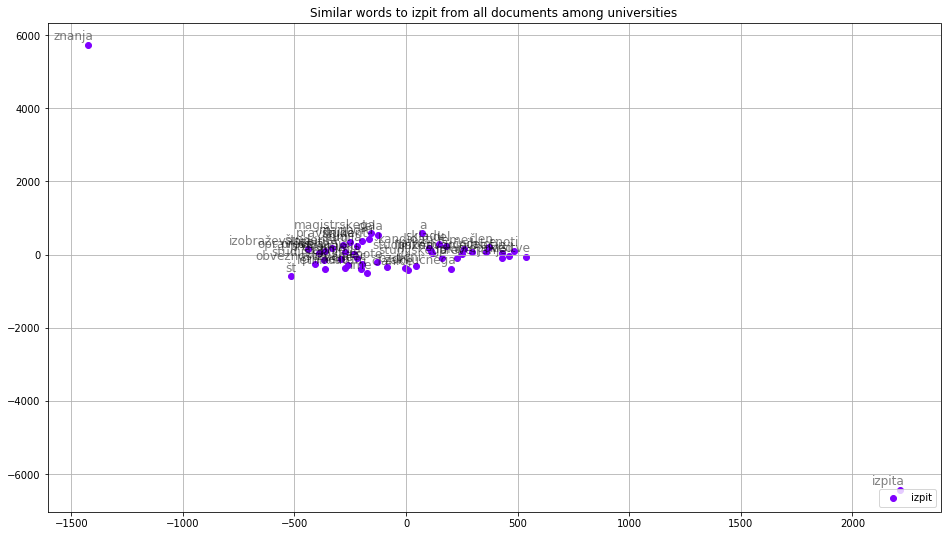

In [28]:
# Import notebook with plot methods
import ipynb.fs.full.GraphDrawer as Plotter

keys = ['izpit']
Plotter.PlotGraphPreplexity4("Similar words to "'izpit'" from all documents among universities",keys, "GraphImages/similar_words_izpit.png")

In [34]:
# now let's find 2 words that have very low similarity, that means words should also have verry different vectors
print("Similarity between words:", w2v_model.similarity('barva','akt'))

Similarity between words: -0.09351207


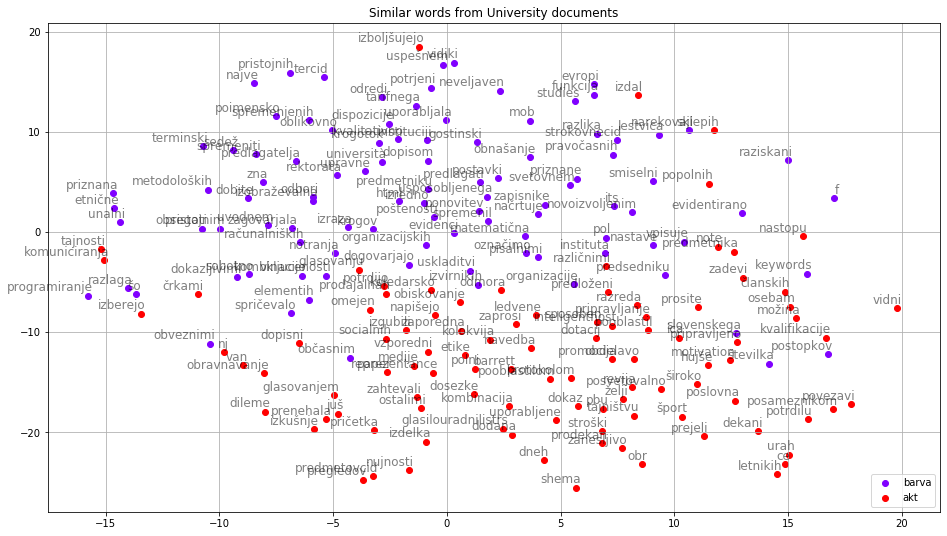

In [30]:
keys = ['barva','akt']
Plotter.PlotGraphPreplexity15("Similar words from University documents",keys, "GraphImages/similar_words_low_similarity.png")

C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


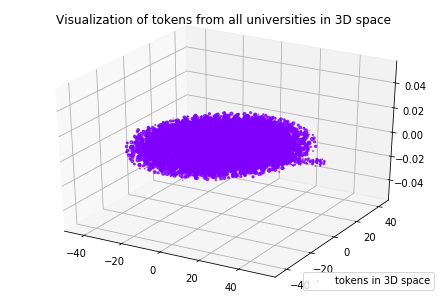

In [19]:
Plotter.Plot3D("Visualization of tokens from all universities in 3D space", "tokens in 3D space")

# Dov2Vec document embedding


#### The numerical presentation of text documents is a challenging task in the field of machine learning. Such presentation can be used for various purposes such as: Document retrieval, Web search, Spam filtering, Text / document detection, topic modeling a.k.a. topic modeling (for which LDA exists but is difficult to "evaluate").


Doc2Vec is a library that is actually Word2Vec based greatly upgrading Word2Vec's existing capabilities. With usage of Doc2Vec while training both Word vectors (W) and Doc vectors (D) are determined.

Same as with Word2Vec, with Doc2Vec we also know 2 approaches to build a model:
- PV-DBOW (Paragraph vector - distributed bag of words)
- PV-DM (Paragraph vector - distributed memory), in practice this approach showed more efficient and more used.

Why to use Doc2Vec?
- It is great to present words with numerical values, we can perform computational operations, we can see the relations between words and similarities, but Word2Vec alone has one major flaw, namely the lack of semantics and syntactic sequence of words. Doc2Vec is, among other things, able to detect word relationships and to understand semantics or. the content of the text.
In order to understand the basic operation of Doc2Vec, it is necessary to understand how Word2Vec works, since it uses the same logic except for the specific vector behind each document.

Some important parameters needed for training of Doc2Vec model
- dm ({0,1}, optional) 1: PV-DM, 0: PV-DBOW (!! DBOW doesnt save the word vectors to save memory !!! )
    - dbow_words=1 Pri uorabi DBOW, to train word and document vectors simultaneously
- vector_size: Dimensionality of the feature vector
- workers: this is number of threads which we assigned number of cores (CPU)


In [20]:
with open('PDFReaderSavedData/dictionary_of_documents.txt', 'rb') as filehandle:
    # read the data as binary data stream
    data_dict = pickle.load(filehandle)
    
    
# iterate over dictionary and key index, key and value out of dictionary
tagged_data=[]
for i, (k, v) in enumerate(data_dict.items()):
    words = word_tokenize(v.lower())
    #tag = ['document tag '+str(i)]
    tag = [k]
    tagged_data.append(TaggedDocument(words, tag))
    
print('Number of all documents from all universities', len(data_dict.values())) #number of all docuemnts from all universities    

Number of all documents from all universities 209


### Chart "Bag of Words" shows up the most common words

It shows the most common words where the word with the biggest frequency is shown with bigger size/ letter.
Similar as we already did after text cleaning where we output words with the biggest frequency, but here type of chart

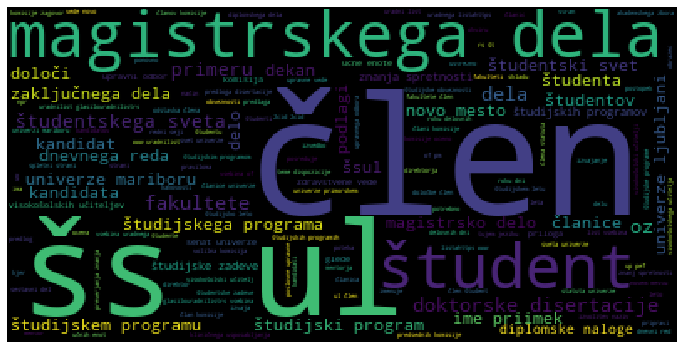

In [21]:
# let's see graph of most common words (100 max) == (stop-words not excluded)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop_list ,max_words=200).generate(PDFData.cleaned_text_universities_joined)

# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Here we will compare DBOW and PV-DM method using Doc2Vec on different ways and look on results we get using different parameters
https://markroxor.github.io/gensim/static/notebooks/doc2vec-IMDB.html
- Using PV DM (already have model - is saving word vectors by default)
- Using DBOW (also train and save word vectors)
- Using DBOW (Dont save vectors -- randomly initialsing)

With results generate HTML table to represent some similarity between words

In [22]:
from gensim.models import Doc2Vec
import gensim.models.doc2vec
from collections import OrderedDict
import multiprocessing

cores = multiprocessing.cpu_count()
assert gensim.models.doc2vec.FAST_VERSION > -1, "OTHERWISE IT IS MUCH SLOWER"

# global parameters for model building
max_epochs = 100
vec_size = 20
alpha = 0.025

In [23]:
# USE PV-DM (is saving word vectors by default)
test_model1 = Doc2Vec(vector_size=vec_size, window=5, alpha=alpha, min_alpha=0.00025, min_count=1, dm =1)
test_model1.build_vocab(tagged_data)
for epoch in range(max_epochs):
    test_model1.train(tagged_data,total_examples=test_model1.corpus_count,epochs=test_model1.iter)
    test_model1.alpha -= 0.0002 
    test_model1.min_alpha = test_model1.alpha

# USE PV-DBOW  (dont save vectors)
test_model2 = Doc2Vec(dm=0, dbow_words=0, window=5, vector_size=vec_size, min_count=1, workers=cores)
test_model2.build_vocab(tagged_data)
for epoch in range(max_epochs):
    test_model2.train(tagged_data,total_examples=test_model2.corpus_count,epochs=test_model2.iter)
    test_model2.alpha -= 0.0002 
    test_model2.min_alpha = test_model2.alpha

# USE PV-DBOW (save word vectors)
test_model3 = Doc2Vec(vector_size=vec_size, window=5, dbow_words=1, min_count=1, workers=cores, dm=0)
test_model3.build_vocab(tagged_data)
for epoch in range(max_epochs):
    test_model3.train(tagged_data,total_examples=test_model3.corpus_count,epochs=test_model3.iter)
    test_model3.alpha -= 0.0002 
    test_model3.min_alpha = test_model3.alpha


C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """
C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  del sys.path[0]
C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


In [24]:
# Join all trained models in 1 list, where each index is one model (needed for html table)
simple_models = [test_model1, test_model2, test_model3]
word_models = simple_models[:]

In [25]:
# pick a random word with a suitable number of occurences
while True:
    word = random.choice(word_models[0].wv.index2word)
    if word_models[0].wv.vocab[word].count > 10:
        break
# or uncomment below line, to just pick a word from the relevant domain:
word = 'izpit'
similars_per_model = [str(model.wv.most_similar(positive=[model[word]], topn=20)).replace('), ','),<br>\n') for model in word_models]
similar_table = ("<table><tr><th>" +
    "</th><th>".join([str(model) for model in word_models]) + 
    "</th></tr><tr><td>" +
    "</td><td>".join(similars_per_model) +
    "</td></tr></table>")
print("most similar words for '%s' (%d occurences)" % (word, simple_models[0].wv.vocab[word].count))
HTML(similar_table)

most similar words for 'izpit' (278 occurences)


"Doc2Vec(dm/m,d20,n5,w5,s0.001,t3)","Doc2Vec(dbow,d20,n5,s0.001,t12)","Doc2Vec(dbow+w,d20,n5,w5,s0.001,t12)"
"[('izpit', 1.0), ('izpita', 0.854745626449585), ('napako', 0.8216831684112549), ('predelav', 0.7871813178062439), ('izvirna', 0.7660871744155884), ('instituciji', 0.7515124082565308), ('enoti', 0.7508835792541504), ('izpiti', 0.7483633160591125), ('preizkus', 0.7401599884033203), ('vrsticami', 0.7361011505126953), ('izpitov', 0.7312581539154053), ('študent', 0.7288119792938232), ('osebje', 0.7248630523681641), ('uspešen', 0.7220396995544434), ('teko', 0.7149175405502319), ('kandidatu', 0.7109729051589966), ('predmetu', 0.7096779346466064), ('testiranje', 0.7089417576789856), ('nepedagoški', 0.7056500315666199), ('izpitno', 0.7048215866088867)]","[('izpit', 1.0000001192092896), ('trikotnik', 0.7180967926979065), ('dokumentiranega', 0.7118728160858154), ('eksperimentalnemu', 0.6994653940200806), ('magisterij', 0.6890889406204224), ('leiter', 0.6834211945533752), ('površin', 0.6803300380706787), ('odnos', 0.6754103899002075), ('popravi', 0.6746991276741028), ('arhivi', 0.6707733869552612), ('color', 0.6655134558677673), ('sorazmerno', 0.6652686595916748), ('somentor:2', 0.660140872001648), ('členčrtan.165', 0.6532064080238342), ('obseg', 0.6502118706703186), ('revizijo', 0.6479049921035767), ('verzijo', 0.6449585556983948), ('manjkajoča', 0.6385531425476074), ('objave.', 0.629217267036438), ('pokojninsko', 0.6291173696517944)]","[('izpit', 1.0), ('komisijski', 0.9353265166282654), ('ustni', 0.8989951610565186), ('diferencialni', 0.8692991733551025), ('odjavi', 0.8640762567520142), ('praktični', 0.8614000082015991), ('kolokvij', 0.8547039031982422), ('izpita', 0.8444544076919556), ('izpiti', 0.8245890140533447), ('test', 0.8209832906723022), ('delni', 0.8175718784332275), ('seminar', 0.8150593042373657), ('individualen', 0.8133105039596558), ('izpitno', 0.8133065700531006), ('izpitna', 0.8104163408279419), ('□', 0.8096690773963928), ('izpitni', 0.8096327185630798), ('pisni', 0.8092174530029297), ('opravljati', 0.8034672737121582), ('popravlja', 0.8024982213973999)]"


#### It is observed that different results are obtained depending on the parameters used in the model initialization. However, we are somewhat limited in the data set. If a larger amount of data were used for learning, a model that does not store word vectors would find more visible differences between words.


#### Now let's try to do some analysis and compare the data with the data obtained from Word2Vec, we will use the PV DM model (Model 1)


In [26]:
# let's build Doc2Vec model again
d2v_model = Doc2Vec(vector_size=vec_size, window=5, alpha=alpha, min_alpha=0.00025, min_count=1, dm =1)
d2v_model.build_vocab(tagged_data)

#d2v_model.train(tagged_data,total_examples=d2v_model.corpus_count,epochs=d2v_model.epochs)
   
# Train the model with 100 epochs 
for epoch in range(max_epochs):   
    d2v_model.train(tagged_data,epochs=d2v_model.iter,total_examples=d2v_model.corpus_count)
    d2v_model.alpha -= 0.0002
    d2v_model.min_alpha = d2v_model.alpha
    #print("Epoch #{} is complete.".format(epoch+1)) #UNCOMENT IF YOU WANT TO PRINT EPOCHS
    

#save model
d2v_model.save("Doc2Vec/Doc2Vec.model")
print("Model Saved")

C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':


Model Saved


In [27]:
# Now we can just re-load the already trained model
d2v_model= Doc2Vec.load("Doc2Vec/Doc2Vec.model")

### We have sucesfully trained the Doc2Vec model, let's compare the results with Word2vec

In [28]:
from gensim.models import doc2vec
from scipy import spatial

#to find the vector of a document which is not in training data
test_data = word_tokenize("To je pravilnik o študentih".lower())
v1 = d2v_model.infer_vector(test_data)
print("Vector of document that is not in training data\n", v1)

# to find most similar doc using tags -- > find most similar docs to document with tag 'Pravilnik_2009_UM'
similar_doc = d2v_model.docvecs.most_similar('Pravilnik_2009_UM')
print("\nmost similar doc to document: "'Pravilnik_2009_UM'"\n", similar_doc)

# let's print the vector of document with tag: "Pravilnik_2009_UM"
print("\ndoc vecs:\n",d2v_model.docvecs['Pravilnik_2009_UM'])


Vector of document that is not in training data
 [-0.03754601 -0.03917725  0.10029324 -0.04624684 -0.04121735 -0.04099468
  0.01855709  0.00934938  0.01339291 -0.04988479  0.04787787  0.07106002
  0.01796935 -0.01004397 -0.03774839  0.07362369 -0.03819959  0.01406068
  0.03736002 -0.01210957]

most similar doc to document: Pravilnik_2009_UM
 [('Pravilnik o preverjanju in ocenjevanju znanja na UM', 0.9983342289924622), ('Pravilnik_o_študijskem_redu_na_ULZF', 0.9764935970306396), ('Študijski_red_Univerze v Ljubljani_ULPEF', 0.9702621698379517), ('Izpiti_UMFERI', 0.9394839406013489), ('Pravilnik o študijskem procesu študentov invalidov UM', 0.9151115417480469), ('Študenti s posebnim statusom_UMFERI', 0.7954413890838623), ('pravilnik_o_izvajanju_klinicnega_usposabljanja_studentovi_UNMFZV', 0.7889857292175293), ('Pravilnik o študentih s posebnim statusom UM', 0.7836332321166992), ('Navodila za presojo prošenj študentov_UMPEF', 0.7819824814796448), ('pravilnik_o_disciplinski_odgovornosti_stu

### Cosine distance between documents that were used to train a model

In [29]:
# Lets check cosine distance between two same documents --> Same documents meand that distance should bi 0!!
vec1 = d2v_model.docvecs['Pravilnik o preverjanju in ocenjevanju znanja na UM']
vec2 = d2v_model.docvecs['Pravilnik o preverjanju in ocenjevanju znanja na UM']
distance = spatial.distance.cosine(vec1, vec2)
print("Distance between two same documents in training corpus (should be 0,0): ",distance)

# lets check distance between two different documents --> Both are from FERI dataset so, distance should be low
vec1 = d2v_model.docvecs['Pravilnik o preverjanju in ocenjevanju znanja na UM']
vec2 = d2v_model.docvecs['Pravilnik_2009_UM']
distance = spatial.distance.cosine(vec1, vec2)
print("Distance between two documents in training corpus (both from FERI dataset -- should be low): ",distance)

# Now we take 1 feri docuements and 1 from ????? distance should be way more big that above.
vec1 = d2v_model.docvecs['Pravilnik_2009_UM']
vec2 = d2v_model.docvecs['NAVODILA o uporabi službenih vozil _UPPEF']
distance = spatial.distance.cosine(vec1, vec2)
print("Distance between two documents in training corpus (UM VS UPPEF -- should be bigger): ",distance)



Distance between two same documents in training corpus (should be 0,0):  0.0
Distance between two documents in training corpus (both from FERI dataset -- should be low):  0.0016658902168273926
Distance between two documents in training corpus (UM VS UPPEF -- should be bigger):  0.6175095438957214


### Cosine distance between 2 documents that were not a part of training dataset -- Infered vectors

In [30]:
# Doc2vec model provides an infer_vector implementation which allows generating the vector presentation 
# of new document which can be compared with the document vectors in the training model.

# Now we will check the distance between two documemnts that are not in training set
first_document = 'študent in pravni akt. Fakulteta je zakon.'
second_document = 'študent in pravni akt. Fakulteta je zakon.'

vec1 = d2v_model.infer_vector(first_document.split()) 
vec2 = d2v_model.infer_vector(second_document.split())

distance = spatial.distance.cosine(vec1, vec2)
print("Cosine distance between 2 infered documents/ vectors: ", distance)

Cosine distance between 2 infered documents/ vectors:  0.14122098684310913


### Most similar word to word 'izpit' and most similar to document at index 0

In [31]:
#Let's see the most similar words to 'izpit' with Doc2Vec model
sim_words = d2v_model.wv.most_similar(positive=[d2v_model['izpit']]) 
sim_words

[('izpit', 1.0),
 ('izpiti', 0.8348087668418884),
 ('izpita', 0.7983042597770691),
 ('kandidatu', 0.790034830570221),
 ('testiranje', 0.7725398540496826),
 ('vaje', 0.7665202021598816),
 ('predmetu', 0.7600406408309937),
 ('zadnjim', 0.7481873035430908),
 ('vrsticami', 0.7466270327568054),
 ('testiranec', 0.7450830936431885)]

In [32]:
#lets find most similar documents to document at index 0
similar_doc = d2v_model.docvecs.most_similar([0])
similar_doc

[('pravilnik_o_pripravi_in_zagovoru_doktorske_disertacijei_UNMFZV',
  0.8245065212249756),
 ('pravilnik_o_merilih_in_postopku_za_izvolitev_v_nazivei_UNMFZV',
  0.820537805557251),
 ('pravilnik_o_pripravi_in_zagovoru_doktorske_disertacije_UNMFPUV',
  0.8173350691795349),
 ('Pravilnik_o_postopku_priprave_in_zagovora_doktorske_UM',
  0.8074375987052917),
 ('pravilnik_o_priznavanju_znanja_in_spretnosti_UNMFZV', 0.7815207242965698),
 ('download.php_file=18_UP', 0.7709656953811646),
 ('pravilnik_o_zrdi_UNMFZV', 0.7159293293952942),
 ('Potek zagovora doktorske disertacij_UMFERI', 0.6715643405914307),
 ('pravilnik_o_priznavanju_znanja_in_spretnosti_pridobljenih_pred_vpisom_UNMFPUV',
  0.6568284630775452),
 ('Spremembe_in_dopolnitve_Pravilnik_o_priznanjih_UMFZV', 0.6504261493682861)]

### Now we have vectors for each document, let's try to plot these vectors on 2d/ 3d plot to visualize conections ana similarities, just like with Word2Vec

VectorDimensionTransformer.ipynb notebook is transforming 20 dimensional vectors of documents into 2d aray. 

In [33]:
# let's import ipynb notebook that is computing vectors into 2d array
import ipynb.fs.full.VectorDimensionTransformer as GraphData


20 dimensional vectors of document transformed into 2D array.
                                                            x          y
Kriteriji_157_clen_Statut_UM_po_clanicah_UM         10.334728   9.586492
Navodila_o_pripravi_in_oddajI_e_oblike_zakljucn...   6.795034  13.585710
Navodila_za_dokončanje_starih_študijskih_progra...   5.379704   4.089405
Pravilnik o postopku priprave in zagovora magis...   7.988626  11.784364
Pravilnik o preverjanju in ocenjevanju znanja n...   5.948479   1.109473
Pravilnik o pripravi in izvajanju skupnih študi...  -1.283296   2.436850
Pravilnik o pripravi in izvajanju skupnih študi...  -1.280915   2.415329
Pravilnik o priznavanju tujega izobraževanja UM     10.355420   6.443077
Pravilnik o priznavanju znanj in spretnosti v š...  10.750209   5.699152
Pravilnik o priznavanju znanj in spretnosti, pr...  11.040519   5.337364


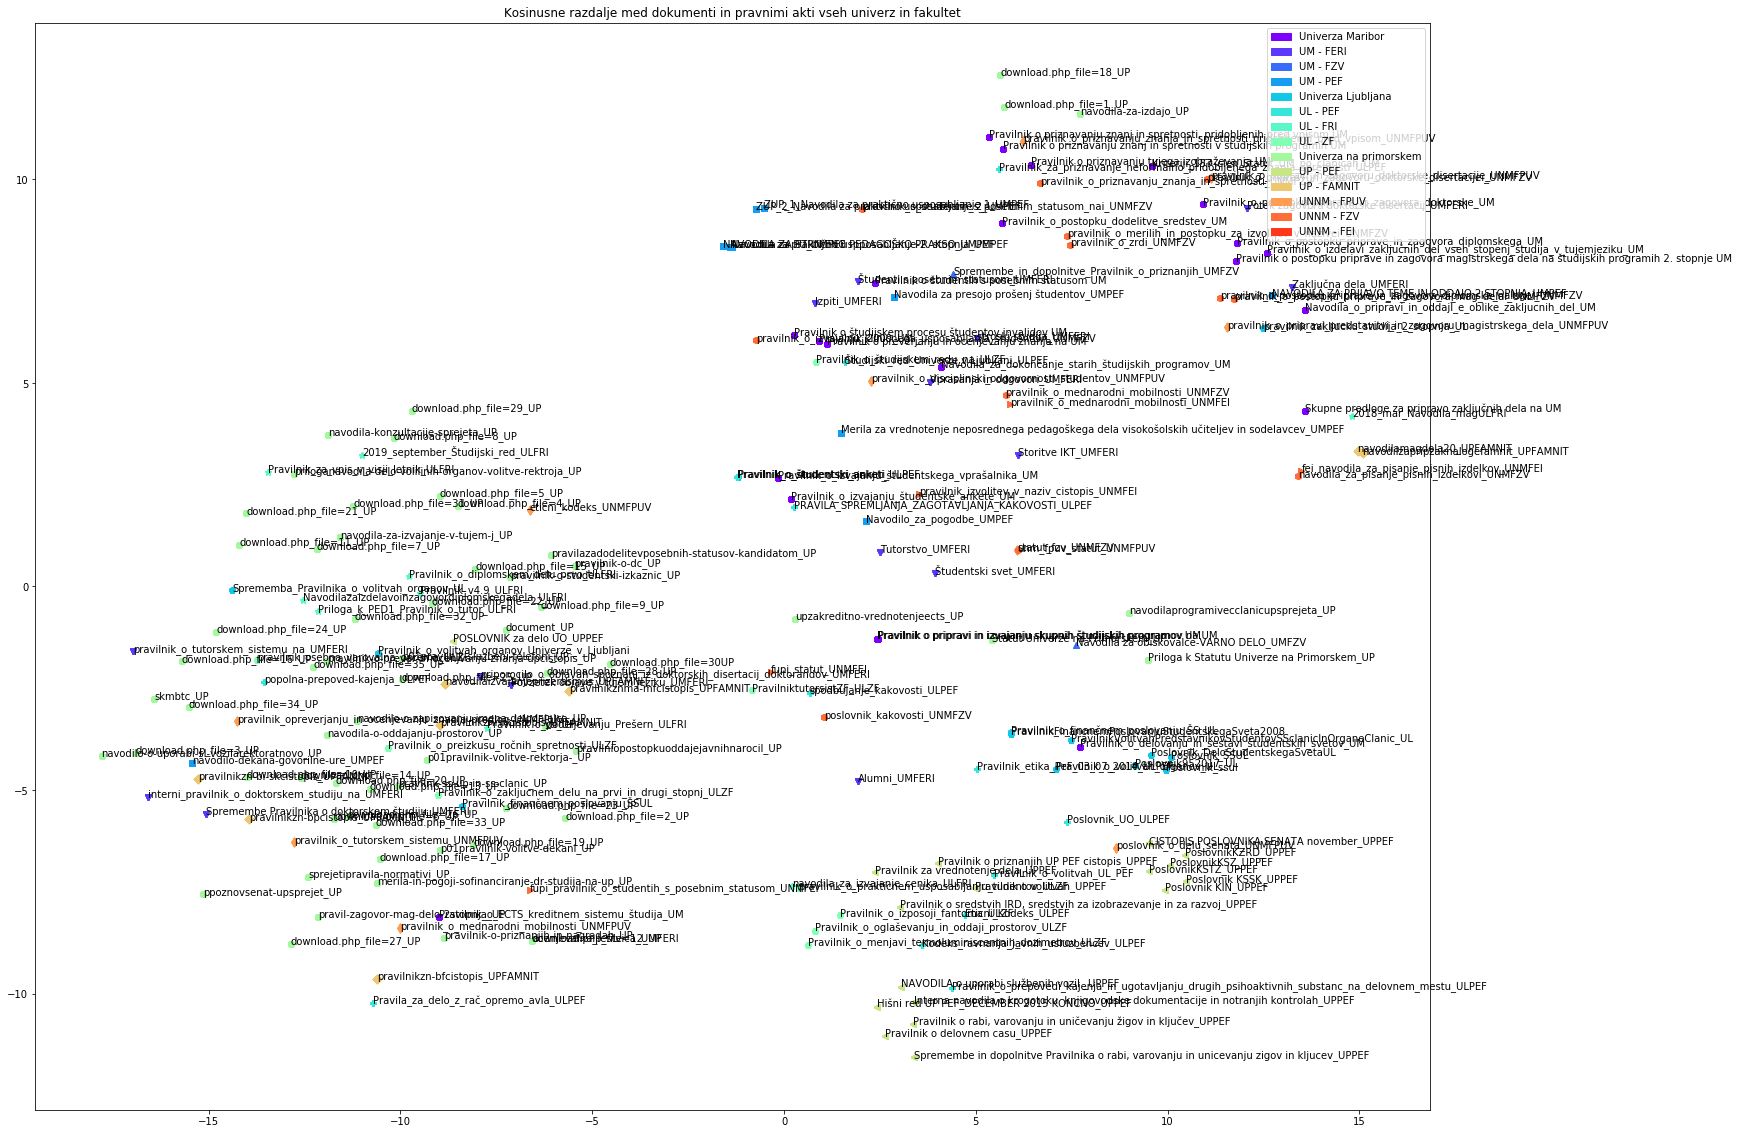

In [34]:
colors = cm.rainbow(np.linspace(0, 1, 15)) # 6 different shades of color for each university sepparetely

plt.rcParams['figure.figsize'] = [25, 20]
fig, ax = plt.subplots()
ax.set_title("Kosinusne razdalje med dokumenti in pravnimi akti vseh univerz in fakultet")

# Univerza Maribor (marker: circle)
for a, txt in enumerate(GraphData.um_n):
    ax.scatter(GraphData.um_z, GraphData.um_y, color=colors[0], marker='o')
    ax.annotate(txt, (GraphData.um_z[a], GraphData.um_y[a]))
    
# Univerza Maribor - FERI (marker: triangle_down)
for a, txt in enumerate(GraphData.um_n_feri):
    ax.scatter(GraphData.um_z_feri, GraphData.um_y_feri, color=colors[1], marker="v")
    ax.annotate(txt, (GraphData.um_z_feri[a], GraphData.um_y_feri[a]))
    
# Univerza Maribor - FZV (marker: triangle_up)
for a, txt in enumerate(GraphData.um_n_fzv):
    ax.scatter(GraphData.um_z_fzv, GraphData.um_y_fzv, color=colors[2], marker="^")
    ax.annotate(txt, (GraphData.um_z_fzv[a], GraphData.um_y_fzv[a]))
    
# Univerza Maribor - PEF (marker: square)
for a, txt in enumerate(GraphData.um_n_pef):
    ax.scatter(GraphData.um_z_pef, GraphData.um_y_pef, color=colors[3], marker="s")
    ax.annotate(txt, (GraphData.um_z_pef[a], GraphData.um_y_pef[a]))
    
# Univerza Ljubljana (marker: pentagon)
for b, txt in enumerate(GraphData.ul_n):
    ax.scatter(GraphData.ul_z, GraphData.ul_y, color=colors[4], marker="p")
    ax.annotate(txt, (GraphData.ul_z[b], GraphData.ul_y[b]))
    
# Univerza Ljubljana - PEF (marker: plus-filled)
for b, txt in enumerate(GraphData.ul_n_pef):
    ax.scatter(GraphData.ul_z_pef, GraphData.ul_y_pef, color=colors[5], marker="P")
    ax.annotate(txt, (GraphData.ul_z_pef[b], GraphData.ul_y_pef[b]))

# Univerza Ljubljana - FRI (marker: star)
for b, txt in enumerate(GraphData.ul_n_fri):
    ax.scatter(GraphData.ul_z_fri, GraphData.ul_y_fri, color=colors[6], marker="*")
    ax.annotate(txt, (GraphData.ul_z_fri[b], GraphData.ul_y_fri[b]))
    
# Univerza Ljubljana - ZF (marker: hexagon2)
for b, txt in enumerate(GraphData.ul_n_fzv):
    ax.scatter(GraphData.ul_z_fzv, GraphData.ul_y_fzv, color=colors[7], marker="H")
    ax.annotate(txt, (GraphData.ul_z_fzv[b], GraphData.ul_y_fzv[b]))
    
# Univerza na primorskem (marker: circle)
for b, txt in enumerate(GraphData.up_n):
    ax.scatter(GraphData.up_z, GraphData.up_y, color=colors[8], marker="o")
    ax.annotate(txt, (GraphData.up_z[b], GraphData.up_y[b]))
    
# Univerza na primorskem - PEF (marker: triangle_left)
for b, txt in enumerate(GraphData.up_n_pef):
    ax.scatter(GraphData.up_z_pef, GraphData.up_y_pef, color=colors[9], marker="<")
    ax.annotate(txt, (GraphData.up_z_pef[b], GraphData.up_y_pef[b]))
    
# Univerza na primorskem - FAMNIT (marker: diamond)
for b, txt in enumerate(GraphData.up_n_famnit):
    ax.scatter(GraphData.up_z_famnit, GraphData.up_y_famnit, color=colors[10], marker="D")
    ax.annotate(txt, (GraphData.up_z_famnit[b], GraphData.up_y_famnit[b]))
    
# Univerza Novo Mesto - FPUV (marker: thin diamond)
for b, txt in enumerate(GraphData.unnm_n_fpuv):
    ax.scatter(GraphData.unnm_z_fpuv, GraphData.unnm_y_fpuv, color=colors[11], marker="d")
    ax.annotate(txt, (GraphData.unnm_z_fpuv[b], GraphData.unnm_y_fpuv[b]))
    
# Univerza Novo Mesto - FZV (marker: hexagon1)
for b, txt in enumerate(GraphData.unnm_n_fzv):
    ax.scatter(GraphData.unnm_z_fzv, GraphData.unnm_y_fzv, color=colors[12], marker="h")
    ax.annotate(txt, (GraphData.unnm_z_fzv[b], GraphData.unnm_y_fzv[b]))
    
# Univerza Novo Mesto - FEI (marker: triangle_right)
for b, txt in enumerate(GraphData.unnm_n_fei):
    ax.scatter(GraphData.unnm_z_fei, GraphData.unnm_y_fei, color=colors[12], marker=">")
    ax.annotate(txt, (GraphData.unnm_z_fei[b], GraphData.unnm_y_fei[b]))
    
um = mpatches.Patch(color=colors[0], label='Univerza Maribor')
um_feri = mpatches.Patch(color=colors[1], label='UM - FERI')
um_fzv = mpatches.Patch(color=colors[2], label='UM - FZV')
um_pef = mpatches.Patch(color=colors[3], label='UM - PEF')
ul = mpatches.Patch(color=colors[4], label='Univerza Ljubljana')
ul_pef = mpatches.Patch(color=colors[5], label='UL - PEF')
ul_fri = mpatches.Patch(color=colors[6], label='UL - FRI')
ul_fzv = mpatches.Patch(color=colors[7], label='UL - ZF')
up = mpatches.Patch(color=colors[8], label='Univerza na primorskem')
up_pef = mpatches.Patch(color=colors[9], label='UP - PEF')
up_famnit = mpatches.Patch(color=colors[10], label='UP - FAMNIT')
unnm_fpuv = mpatches.Patch(color=colors[11], label='UNNM - FPUV')
unnm_fzv = mpatches.Patch(color=colors[12], label='UNNM - FZV')
unnm_fei = mpatches.Patch(color=colors[13], label='UNNM - FEI')

plt.legend(handles=[um, um_feri, um_fzv, um_pef, ul, ul_pef, ul_fri, ul_fzv, up, up_pef, up_famnit, unnm_fpuv, unnm_fzv, unnm_fei])
plt.savefig('GraphImages/document_distances_with_words.png')
    
plt.show();

### For better view we will add same graph again, but without document names, just pointers with specific color and shape for each institution

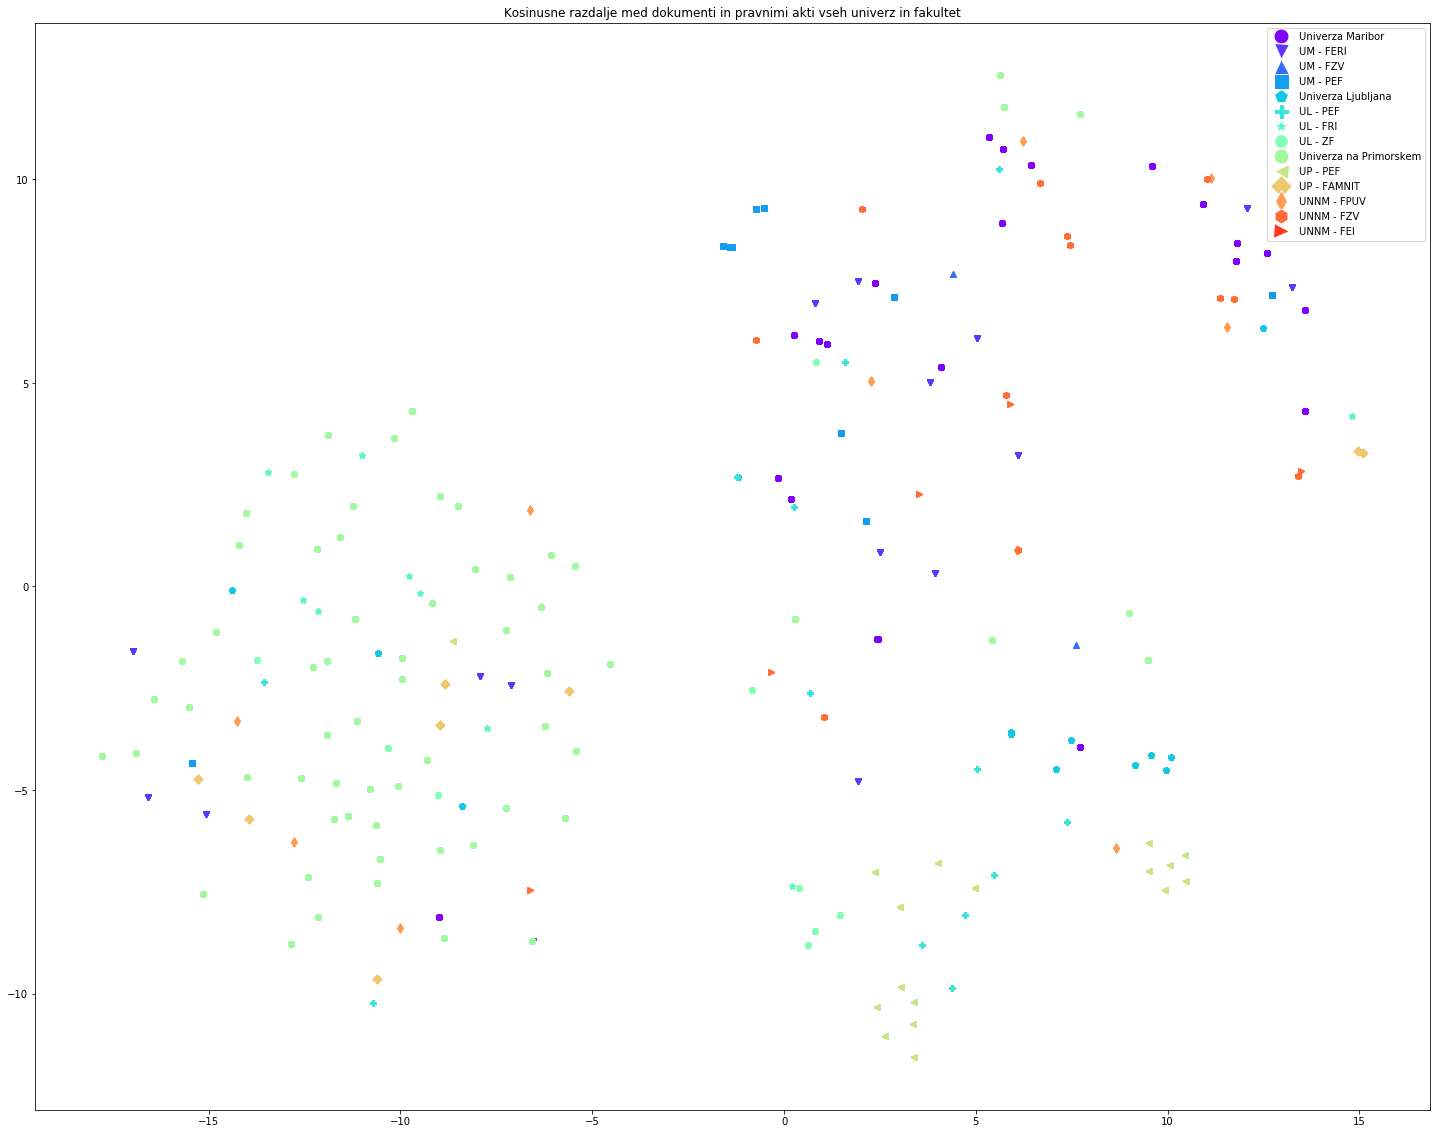

In [35]:

colors = cm.rainbow(np.linspace(0, 1, 15)) # 6 različnih odtenkov barv za vsako univerzo posebej

plt.rcParams['figure.figsize'] = [25, 20]
fig, ax = plt.subplots()
ax.set_title("Kosinusne razdalje med dokumenti in pravnimi akti vseh univerz in fakultet")

# Univerza Maribor (marker: circle)
for a, txt in enumerate(GraphData.um_n):
    ax.scatter(GraphData.um_z, GraphData.um_y, color=colors[0], marker='o')
    ax.annotate('', (GraphData.um_z[a], GraphData.um_y[a]))
    
# Univerza Maribor - FERI (marker: triangle_down)
for a, txt in enumerate(GraphData.um_n_feri):
    ax.scatter(GraphData.um_z_feri, GraphData.um_y_feri, color=colors[1], marker="v")
    ax.annotate('', (GraphData.um_z_feri[a], GraphData.um_y_feri[a]))
    
# Univerza Maribor - FZV (marker: triangle_up)
for a, txt in enumerate(GraphData.um_n_fzv):
    ax.scatter(GraphData.um_z_fzv, GraphData.um_y_fzv, color=colors[2], marker="^")
    ax.annotate('', (GraphData.um_z_fzv[a], GraphData.um_y_fzv[a]))
    
# Univerza Maribor - PEF (marker: square)
for a, txt in enumerate(GraphData.um_n_pef):
    ax.scatter(GraphData.um_z_pef, GraphData.um_y_pef, color=colors[3], marker="s")
    ax.annotate('', (GraphData.um_z_pef[a], GraphData.um_y_pef[a]))
    
# Univerza Ljubljana (marker: pentagon)
for b, txt in enumerate(GraphData.ul_n):
    ax.scatter(GraphData.ul_z, GraphData.ul_y, color=colors[4], marker="p")
    ax.annotate('', (GraphData.ul_z[b], GraphData.ul_y[b]))
    
# Univerza Ljubljana - PEF (marker: plus-filled)
for b, txt in enumerate(GraphData.ul_n_pef):
    ax.scatter(GraphData.ul_z_pef, GraphData.ul_y_pef, color=colors[5], marker="P")
    ax.annotate('', (GraphData.ul_z_pef[b], GraphData.ul_y_pef[b]))

# Univerza Ljubljana - FRI (marker: star)
for b, txt in enumerate(GraphData.ul_n_fri):
    ax.scatter(GraphData.ul_z_fri, GraphData.ul_y_fri, color=colors[6], marker="*")
    ax.annotate('', (GraphData.ul_z_fri[b], GraphData.ul_y_fri[b]))
    
# Univerza Ljubljana - ZF (marker: hexagon2)
for b, txt in enumerate(GraphData.ul_n_fzv):
    ax.scatter(GraphData.ul_z_fzv, GraphData.ul_y_fzv, color=colors[7], marker="H")
    ax.annotate('', (GraphData.ul_z_fzv[b], GraphData.ul_y_fzv[b]))
    
# Univerza na primorskem (marker: circle)
for b, txt in enumerate(GraphData.up_n):
    ax.scatter(GraphData.up_z, GraphData.up_y, color=colors[8], marker="o")
    ax.annotate('', (GraphData.up_z[b], GraphData.up_y[b]))
    
# Univerza na primorskem - PEF (marker: triangle_left)
for b, txt in enumerate(GraphData.up_n_pef):
    ax.scatter(GraphData.up_z_pef, GraphData.up_y_pef, color=colors[9], marker="<")
    ax.annotate('', (GraphData.up_z_pef[b], GraphData.up_y_pef[b]))
    
# Univerza na primorskem - FAMNIT (marker: diamond)
for b, txt in enumerate(GraphData.up_n_famnit):
    ax.scatter(GraphData.up_z_famnit, GraphData.up_y_famnit, color=colors[10], marker="D")
    ax.annotate('', (GraphData.up_z_famnit[b], GraphData.up_y_famnit[b]))
    
# Univerza Novo Mesto - FPUV (marker: thin diamond)
for b, txt in enumerate(GraphData.unnm_n_fpuv):
    ax.scatter(GraphData.unnm_z_fpuv, GraphData.unnm_y_fpuv, color=colors[11], marker="d")
    ax.annotate('', (GraphData.unnm_z_fpuv[b], GraphData.unnm_y_fpuv[b]))
    
# Univerza Novo Mesto - FZV (marker: hexagon1)
for b, txt in enumerate(GraphData.unnm_n_fzv):
    ax.scatter(GraphData.unnm_z_fzv, GraphData.unnm_y_fzv, color=colors[12], marker="h")
    ax.annotate('', (GraphData.unnm_z_fzv[b], GraphData.unnm_y_fzv[b]))
    
# Univerza Novo Mesto - FEI (marker: triangle_right)
for b, txt in enumerate(GraphData.unnm_n_fei):
    ax.scatter(GraphData.unnm_z_fei, GraphData.unnm_y_fei, color=colors[12], marker=">")
    ax.annotate('', (GraphData.unnm_z_fei[b], GraphData.unnm_y_fei[b]))
    

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Univerza Maribor', markerfacecolor=colors[0], markersize=15),
                   Line2D([0], [0], marker='v', color='w', label='UM - FERI', markerfacecolor=colors[1], markersize=15),
                   Line2D([0], [0], marker="^", color='w', label='UM - FZV', markerfacecolor=colors[2], markersize=15),
                   Line2D([0], [0], marker="s", color='w', label='UM - PEF', markerfacecolor=colors[3], markersize=15),
                   Line2D([0], [0], marker='p', color='w', label='Univerza Ljubljana', markerfacecolor=colors[4], markersize=15),
                   Line2D([0], [0], marker='P', color='w', label='UL - PEF', markerfacecolor=colors[5], markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='UL - FRI', markerfacecolor=colors[6], markersize=15),
                   Line2D([0], [0], marker='H', color='w', label='UL - ZF', markerfacecolor=colors[7], markersize=15),
                   Line2D([0], [0], marker="o", color='w', label='Univerza na Primorskem', markerfacecolor=colors[8], markersize=15),
                   Line2D([0], [0], marker="<", color='w', label='UP - PEF', markerfacecolor=colors[9], markersize=15),
                   Line2D([0], [0], marker='D', color='w', label='UP - FAMNIT', markerfacecolor=colors[10], markersize=15),
                   Line2D([0], [0], marker='d', color='w', label='UNNM - FPUV', markerfacecolor=colors[11], markersize=15),
                   Line2D([0], [0], marker='h', color='w', label='UNNM - FZV', markerfacecolor=colors[12], markersize=15),
                   Line2D([0], [0], marker='>', color='w', label='UNNM - FEI', markerfacecolor=colors[13], markersize=15)]


plt.legend(handles=legend_elements)
plt.savefig('GraphImages/document_distances_no_doc_names.png')
    
plt.show();

# FastText tool

### Text classification is a fundamental issue in some applications, such as spam / mail detection, sentiment analysis, or smart answer systems. In this segment, we will focus on  'FastText' tools in combination of Slovemne language and faculty documents.

### Goal of text classification: 
#### The purpose of text classification is to assign or arrange documents (such as: emails, posts, text messages, product reviews, etc.) to one or more categories. These categories can be, for example, Quality Scores, spam/ not spam, languages in which the document was written etc. This problem is now solved by machine learning, that is, learning the classification rules from examples.) To compile such classifiers, we need information that consists of documents and their corresponding categories (tags).

#### FastText is a free open source library that allows users to generate word embeding models and build text classifiers

#### FastText is based on the "supervised" and "un-supervised" learning modes. Supervised is used where we have input INPUTS (X) and OUTPUT (Y), and we use an algorithm to teach the system the conversions between X and Y (we build clasifier). Un-supervised mode, however, is learning where we only have the INPUT variable (X) and not the specific output variables, as the goal of the program is to learn how to understand the input data (eg, understanding word-to-text connections, as we now build Word2Vec and Doc2Vec models).


##### Useful: https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/


### UNSUPERVISED LEARNING (Unsupervised algorithms in fastText module)

In [36]:
# missing methods in pypi for fasttext
# https://stackoverflow.com/questions/57903873/how-to-get-nearest-neighbours-in-fasttext-for-unsupervised-learning-models-cbow
#https://github.com/facebookresearch/fastText/tree/master/python

# works only when reading from .txt
with open("FastTextModel/cleaned_text_universities_joined.txt", "wb") as text_file:
    text_file.write(PDFData.cleaned_text_universities_joined.encode('utf-8')) 

#training the unsupervised model (cbow or skip-gram)
fastText_model = fasttext.train_unsupervised("FastTextModel/cleaned_text_universities_joined.txt", model='cbow') # works only when reading from .txt

# save model for later use
fastText_model.save_model("FastTextModel/FastTextUnsupervised.bin")

In [37]:
# load model
fastText_model = fasttext.load_model("FastTextModel/FastTextUnsupervised.bin")

In [38]:
# print a list of words in dictionary
print(fastText_model.words)

['in', 'v', 'za', 'na', 'je', 'se', 'o', 'ki', 's', 'člen', 'z', 'ali', 'po', 'lahko', 'da', 'pri', 'če', 'so', 'univerze', 'dela', 'ter', 'ne', 'iz', 'tudi', 'študent', '\uf0b7', 'komisije', 'mora', 'tem', 'fakultete', 'od', '•', 'do', '1', 'oziroma', 'ul', 'kot', 'pa', '1.', 'članice', 'skladu', 'jih', 'tega', '2', 'delo', '2.', '–', 'šs', 'ga', 'ni', 'komisija', 'disertacije', 'pred', '3', 'senata', '3.', 'senat', 'k', 'študentov', 'oz.', 'i', 'magistrskega', 'predsednik', 'biti', 'druge', 'študijskih', ',', 'študijskega', 'znanja', 'doktorske', 'seje', 'drugih', 'šsul', 'fakulteta', '−', 'seji', 'kandidat', '4.', 'fakultete.', 'dni', 'e', 'obveznosti', 'ima', 'ime', 'študentskega', 'članov', 'sveta', 'med', 'podlagi', 'oceno', 'ob', 'študijske', '5', 'predlog', 'del', 'ko', 'zagovor', 'a', 'dekan', 'roku', 'delovnih', 'ta', 'študija', 'študenta', 'študentski', '4', 'določi', 'študijskem', 'teme', 'postopek', '6.', 'naloge', 'izpita', 'delu', 'študijski', '5.', 'priloga', 'of', 'pri

In [39]:
# get the vector of the word 'izpit'
print(fastText_model['izpit'])    

[-1.8158329  -0.7583443  -1.1202563   0.70589244 -2.7579632   0.7136089
 -1.398879    0.23592007 -0.17572789  1.823386   -1.6919653  -1.5462266
  1.2270087  -0.15877672  1.608002   -1.2585903  -1.9062575   0.9984554
 -0.19653249 -1.5600195   0.02523502 -1.326186    1.9675819  -0.2687427
 -0.8224755  -0.10729849  0.5171879  -2.5543983  -0.66720265  1.6433163
 -1.5175526  -0.14837748  0.13709185 -1.5605576  -0.64545107  2.1357415
  1.0145334  -0.7172572   0.40084562 -3.3345194   0.07215839 -1.0109384
 -2.0254545  -1.6311839  -0.8339114  -1.7121725   1.9156787  -0.6856684
  0.58100814 -0.27822185  5.034259   -0.9594539  -0.69120985  3.9706542
  3.5591323   0.5466989   2.9434497  -1.3259838   3.7243595  -1.2069739
 -0.9105549  -0.46266365  1.4599186   1.9372811  -0.19977117 -0.955272
  2.479531   -1.3363384  -0.6049784   0.67773724  2.1846273  -0.43588415
 -1.0667365   0.5563671   0.717496    0.27007246  0.83186936  0.37744614
 -2.3369963  -1.6750098   0.6738817   1.4971766  -0.6624865  -1

In [40]:
 # check if a word is in dictionary
print('king' in fastText_model) 

False


#### Unfortunately most of the fastText API'S are unavailable dure to pypi release still does not provide that methods. To get 100% functionalities of fasttext working we have 2 options according to: https://stackoverflow.com/questions/57903873/how-to-get-nearest-neighbours-in-fasttext-for-unsupervised-learning-models-cbow?fbclid=IwAR0I_MuYr4cRdq2CTZ3ZzfcC2RS50HNrX_PvJ3Y0m2BW3Fh--tbGMLtj90s

1.) install pyfasttext (not recomended not supported wrapper for fasttext and obsolete)
2.) Install latest development version of fasttext on local machine

Latest version is available on: https://github.com/facebookresearch/fastText/tree/master/python

In [41]:
# example of how it worked with latest development version is available as picture:
# http://shrani.si/f/2x/q5/1QrxI5kE/1.png
# based on https://github.com/facebookresearch/fastText/issues/384
# AND
# https://github.com/facebookresearch/fastText/pull/552
# AND
# https://github.com/facebookresearch/fastText/issues/322
# AND
# https://stackoverflow.com/questions/57903873/how-to-get-nearest-neighbours-in-fasttext-for-unsupervised-learning-models-cbow?fbclid=IwAR0I_MuYr4cRdq2CTZ3ZzfcC2RS50HNrX_PvJ3Y0m2BW3Fh--tbGMLtj90s

In [42]:
class FastTextNN: 
    def __init__(self, ft_model, ft_matrix=None):
        self.ft_model = ft_model        
        self.ft_words = ft_model.get_words()
        self.word_frequencies = dict(zip(*ft_model.get_words(include_freq=True)))
        self.ft_matrix = ft_matrix
        if self.ft_matrix is None:
            self.ft_matrix = np.empty((len(self.ft_words), ft_model.get_dimension()))
            for i, word in enumerate(self.ft_words):
                self.ft_matrix[i,:] = ft_model.get_word_vector(word)
    
    def find_nearest_neighbor(self, query, vectors, n=10,  cossims=None):
        if cossims is None:
            cossims = np.matmul(vectors, query, out=cossims)

        norms = np.sqrt((query**2).sum() * (vectors**2).sum(axis=1))
        cossims = cossims/norms
        result_i = np.argpartition(-cossims, range(n+1))[1:n+1]
        return list(zip(result_i, cossims[result_i]))

    def nearest_words(self, word, n=10, word_freq=None):
        result = self.find_nearest_neighbor(self.ft_model.get_word_vector(word), self.ft_matrix, n=n)
        if word_freq:
            return [(self.ft_words[r[0]], r[1]) for r in result if self.word_frequencies[self.ft_words[r[0]]] >= word_freq]
        else:
            return [(self.ft_words[r[0]], r[1]) for r in result]    
        
# let's try to print some of the most similar words to word 'izpit' with FastText on jupyter notebooks
fasttext_nn = FastTextNN(fastText_model) # pass your fasttext model here
print(fasttext_nn.nearest_words('izpit'))

[('izpitu.', 0.9996892949215462), ('izpit,', 0.999417636826794), ('izpit.', 0.9992861926895357), ('izpitu', 0.9992769008681532), ('izpitu,', 0.9982527550004934), ('izpitno', 0.9974224361561569), ('izpitne', 0.9973557082498576), ('izpita', 0.9970984192414746), ('izpita,', 0.996279227503391), ('izpita:', 0.9962471770600617)]


### Supervised learning (supervised algoritms in fastText, note: classes marked with __label__)


In [43]:
# first we have to prepare our dataset. as classes faculties will be used (14 faculties == 14 classes)
# https://medium.com/@ravindraprasad/build-your-own-text-classification-in-less-than-25-lines-of-code-using-fasttext-dae7229f80f9
# iterate over dictionary and key index, key and value out of dictionary and for each legal act add label
stringtext=''

# ***************************************UM ********************************
for i, (k, v) in enumerate(documents_um.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__um'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_um_feri.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__umferi'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_um_fzv.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__umfzv'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_um_pef.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__umpef'+' '+ str.join(" ", v.splitlines())+' '

# ***************************************UL ********************************
for i, (k, v) in enumerate(documents_ul.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__ul'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_ul_pef.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__ulpef'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_ul_fri.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__ulfri'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_ul_fzv.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__ulzf'+' '+ str.join(" ", v.splitlines())+' '

# ***************************************UP ********************************
for i, (k, v) in enumerate(documents_up.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__up'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_up_pef.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__uppef'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_up_famnit.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__upfamnit'+' '+ str.join(" ", v.splitlines())+' '
   
   
# ***************************************UNNM ********************************
for i, (k, v) in enumerate(documents_unnm_fpuv.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__unnmfpuv'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_unnm_fzv.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__unnmfzv'+' '+ str.join(" ", v.splitlines())+' '

for i, (k, v) in enumerate(documents_unnm_fei.items()):
    if v.strip()!='':
        stringtext=stringtext+'\n'+'__label__unnmfei'+' '+ str.join(" ", v.splitlines())+' '


# save train data for later use
with open("FastTextModel/fasttext_whole_document_per_label.txt", "wb") as text_file:
    text_file.write(stringtext.encode('utf-8'))

In [44]:
# lets load and train model and see what results we will have
fasttext_model1 = fasttext.train_supervised(input="FastTextModel/fasttext_whole_document_per_label.txt", epoch=25, lr=1.0)
fasttext_model1.predict("Minister za izobraževanje, znanost in šport Jernej Pikalo,"+ 
               "ki je trenutno v Bruslju, se je na domnevno sporna izplačila na Univerzi v Mariboru odzval z besedami,"+
               "da je treba zadevo preveriti in po potrebi ukrepati.")

(('__label__uppef',), array([0.29558253]))

In [45]:
fasttext_model2 = fasttext.train_supervised(input="FastTextModel/fasttext_1024chars_per_line.txt", epoch=25, lr=1.0)
fasttext_model2.predict("Študent odgovarja za pravilno in popolno prijavo na izpit. ")

(('__label__up',), array([0.98187882]))

In [46]:
# once the model is trained we can retrieve the list of words and labels
print('\nlabels for model 1:', fasttext_model1.labels)


labels for model 1: ['__label__um', '__label__uppef', '__label__unnmfzv', '__label__ulpef', '__label__umferi', '__label__ul', '__label__umpef', '__label__up', '__label__ulzf', '__label__unnmfpuv', '__label__unnmfei', '__label__upfamnit', '__label__ulfri', '__label__umfzv']


In [47]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*fasttext_model1.test('FastTextModel/fasttext_whole_document_per_label.txt'))

N	118
P@1	0.364
R@1	0.364


## Multi - class classification using LinearSVC() and with cros_val_score using
- LinearSVC(),
- LogisticRegression()
- RandomForestClassifier()

In [48]:
import ipynb.fs.full.PandasDTHelper as PandasData
df_data = pd.DataFrame()
df_data = PandasData.df_klasifikacija

In [49]:
df_data.head()

,Label,Content
0,um,Kriteriji in merila članic UM glede zahtevane ...
1,um,Navodila o pripravi in oddaji elektronske obli...
2,um,Senat Univerze v Mariboru je na svoji 34. redn...
3,um,Na osnovi določila 2. točke 253. člena Statuta...
4,um,Datum: 5.8.2015 Neuradno prečiščeno besedilo P...


In [50]:
# steming and cleaning the text content
stemmer = PorterStemmer()
def pred_procesiraj_besedilo(besedilo):
    tokeni = word_tokenize(besedilo)
    tokeni_brez_stop = [stemmer.stem(token) for token in tokeni if token not in slovenian_stopwords]
    return ' '.join(tokeni_brez_stop)

In [51]:
df_data['procesiran'] = df_data['Content'].apply(pred_procesiraj_besedilo)

df_data.head(n=10)

,Label,Content,procesiran
0,um,Kriteriji in merila članic UM glede zahtevane ...,kriteriji merila članic UM glede zahtevan znan...
1,um,Navodila o pripravi in oddaji elektronske obli...,navodila pripravi oddaji elektronsk oblik zakl...
2,um,Senat Univerze v Mariboru je na svoji 34. redn...,senat univerz mariboru 34. redni seji dne 23 ....
3,um,Na osnovi določila 2. točke 253. člena Statuta...,Na osnovi določila 2. točk 253. člena statuta ...
4,um,Datum: 5.8.2015 Neuradno prečiščeno besedilo P...,datum : 5.8.2015 neuradno prečiščeno besedilo ...
5,um,PRAVILNIK O PRIPRAVI IN IZVAJANJU SKUPNIH ŠTUD...,pravilnik O pripravi IN izvajanju skupnih štud...
6,um,PRAVILNIK O PRIPRAVI IN IZVAJANJU SKUPNIH ŠTUD...,pravilnik O pripravi IN izvajanju skupnih štud...
7,um,Na podlagi Zakona o priznavanju in vrednotenju...,Na podlagi zakona priznavanju vrednotenju izob...
8,um,Na podlagi Zakona o visokem šolstvu Uradni lis...,Na podlagi zakona visokem šolstvu uradni list ...
9,um,Na podlagi Zakona o visokem šolstvu Uradni lis...,Na podlagi zakona visokem šolstvu uradni list ...


In [52]:
# preparing the data
vectorizer = TfidfVectorizer(ngram_range=(1,1)) # Make only unigrams and no word processing
vhod = vectorizer.fit_transform(df_data['Content']) # with stopwords, punctuations and without stemming
features_train, features_test, labels_train, labels_test = train_test_split(vhod, df_data['Label'], test_size=0.4, random_state=555)

mnb = LinearSVC()
mnb.fit(features_train, labels_train)
prediction = mnb.predict(features_test)
print('Accuracy of classification without processed text:',accuracy_score(labels_test,prediction))

Accuracy of classification without processed text: 0.5208333333333334


In [53]:
# Preparation of data
vectorizer = TfidfVectorizer(ngram_range=(1,1)) # Naredi le unigram-e in brez procesiranja besedila
vectorised_train_documents = vectorizer.fit_transform(df_data['procesiran']) # (s stopwordi, ločili in brez stemm-inga)

features_train, features_test, labels_train, labels_test = train_test_split(vectorised_train_documents, df_data['procesiran'], test_size=0.4, random_state=555)

# Classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = LinearSVC()
mnb.fit(features_train, labels_train)
prediction = mnb.predict(features_test)
print('Accuracy of classification with processed text:',accuracy_score(labels_test,prediction))

Accuracy of classification with processed text: 0.020833333333333332


In [54]:
output = 'Label'
df_output = df_data[output]
df_input = vectorizer.fit_transform(df_data['Content'])

names=[]
results=[]
classifiers = [] # Seznam kalsifikatorjev

classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(LinearSVC())



for classifier in classifiers:
    kfold = StratifiedKFold(n_splits=3, random_state=123) # Stratified KFold for ten cut checks
    cv_results = cross_val_score(classifier, # classifier model
                                   df_input, # Input data
                                   df_output, # What is result
                                   cv=kfold, # Number of cuts
                                   scoring='accuracy') # MSE Assessment Metric
    
    print('%30s:\t%1.4f' % (type(classifier).__name__, cv_results.mean()))
    names.append(type(classifier).__name__)
    results.append(cv_results.mean())

C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too 

            LogisticRegression:	0.3893
        RandomForestClassifier:	0.3315


C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\u.strnisnik\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of membe

                     LinearSVC:	0.4910


# PRETRAINED MODELS

### Let's also tray to load facebook's train data set and see what results we will get and how accurate they are
##### Facebook's dataset is a set of cooking toopics where one line consists only from one sentence and with 1 or more labels

In [55]:
#https://fasttext.cc/docs/en/supervised-tutorial.html
facebook_model = fasttext.train_supervised(input="FastTextModel/cooking.stackexchange.txt", epoch=25, lr=1.0)

In [56]:
facebook_model.predict("Which baking dish is best to bake a banana bread ?")

(('__label__baking',), array([0.7716555]))

In [57]:
facebook_model.predict("Why not put knives in the dishwasher?")

(('__label__equipment',), array([0.91260314]))

## FastText (pretrained models)

### Unsupervised model

In [58]:
# Load slovenian pre-trained word vectors learned on slovenia wikipedia pages
fastText_unsupervised = fasttext.load_model('FastTextModel/wiki.sl.bin')
fastText_unsupervised.get_dimension()
# fasttext.util.reduce_model(ft, 100) pypi again doesnt have that mnethod
fastText_unsupervised.get_dimension()

fastText_unsupervised.get_word_vector('izpit').shape
#ft.get_nearest_neighbors('hello') #pypi again doesnt have that mnethod use hack below (modified method)
fasttext_nn2 = FastTextNN(fastText_unsupervised) # pass your fasttext model here
print(fasttext_nn.nearest_words('izpit'))


[('izpitu.', 0.9996892949215462), ('izpit,', 0.999417636826794), ('izpit.', 0.9992861926895357), ('izpitu', 0.9992769008681532), ('izpitu,', 0.9982527550004934), ('izpitno', 0.9974224361561569), ('izpitne', 0.9973557082498576), ('izpita', 0.9970984192414746), ('izpita,', 0.996279227503391), ('izpita:', 0.9962471770600617)]


### Supervised model

In [59]:
fastText_supervised = fasttext.load_model('FastTextModel/amazon_review_full.bin')
fastText_supervised.labels

['__label__2', '__label__1', '__label__5', '__label__3', '__label__4']

## Word2Vec (slovenian wiki pretrained)
#### Link to the slovenian pretrained models: http://vectors.nlpl.eu/repository/# 
#### Model was learned using the skip-gram methodology

In [60]:
#https://github.com/RaRe-Technologies/gensim/wiki/Recipes-&-FAQ#q10-loading-a-word2vec-model-fails-with-unicodedecodeerror-utf-8-codec-cant-decode-bytes-in-position-
filename = 'SloTrainedModel/model.txt'
pre_trained_model = gensim.models.KeyedVectors.load_word2vec_format(filename, unicode_errors='ignore') #model was badly trained, without unicode utf-8

In [61]:
print(pre_trained_model['izpit']) # lets see vector representation of word 'izpit'

[ 1.911320e-01  9.796100e-02  7.735580e-01 -6.010000e-02  1.863720e-01
 -1.527690e-01  1.878700e-01 -5.516730e-01  1.906530e-01 -1.384230e-01
  4.403670e-01 -1.874100e-02  2.951910e-01 -4.159470e-01 -5.059630e-01
  7.984760e-01 -8.092800e-02 -3.295710e-01  3.633940e-01  6.766380e-01
  2.623250e-01 -2.184060e-01  1.560950e-01 -3.058750e-01  3.438820e-01
 -6.363800e-01  6.880000e-04  4.973880e-01 -3.990000e-02 -7.278180e-01
  6.542500e-02 -6.577110e-01 -9.582660e-01 -1.976980e-01 -6.321160e-01
  5.782570e-01 -1.050050e-01 -9.623100e-02  9.271050e-01 -2.636080e-01
  3.236730e-01  2.331300e-02  6.377000e-02 -4.267600e-01  8.435390e-01
 -3.769800e-01  4.799050e-01  8.195500e-02 -2.264400e-02  4.997700e-02
 -6.976000e-03 -7.189730e-01  3.200410e-01  5.108830e-01 -1.137431e+00
 -3.497540e-01  2.917290e-01  3.002510e-01  3.750800e-02 -1.413290e-01
 -2.638050e-01  3.488770e-01  8.522770e-01 -1.517640e-01  8.353200e-02
  5.476710e-01  2.736900e-01 -5.495380e-01  1.105350e-01  1.772600e-01
 -3.03

In [62]:
#we can see one problem, model was trained with stop words and special characters, they were not removed
words = list(pre_trained_model.vocab)
print(words[:100])

['</s>', ',', '.', 'in', 'je', 'v', 'na', 'za', '-', ':', 'se', ')', '(', 'da', 'ki', 'so', 'pa', 'z', 's', 'ne', 'tudi', 'kot', 'po', 'lahko', 'od', 'to', 'ali', 'o', 'do', 'bi', 'pri', '"', 'bo', 'še', 'iz', 'če', '/', '?', 'ni', 'tako', 'ob', 'med', 'več', '»', 'si', 'kar', '!', 'hotel', 'vse', 'že', 'ko', 'ga', 'leta', 'sem', 'jih', 'samo', 'tega', 'ter', 'tem', '–', ';', 'bil', 'ker', '1', 'a', 'bodo', 'zaradi', 'kaj', '2', 'ta', '2012', '«', 'le', 'saj', '|', 'pred', 'bila', 'voljo', 'zato', 'vam', 'nekaj', 'strani', 'zelo', 'jo', 'ima', 'bilo', 'kjer', '3', 'naj', 'mi', 'kako', '2011', 'smo', 'nahaja', 'ti', 'veliko', 'the', 'boste', 'sta', 'vseh']


In [63]:
#kraljica = (kralj - moški) + ženska
result = pre_trained_model.most_similar(positive=['ženska', 'kralj'], negative=['moški'], topn=1)
print(result)

[('kraljica', 0.722774863243103)]


In [64]:
#Ljubljana = (Zagreb -Hrvaška) + Slovenia
#vector('Zagreb') - vector('Hrvaška') + vector('Slovenia') == Ljubljana?
result = pre_trained_model.most_similar(positive=['slovenija', 'zagreb'], negative=['hrvaška'], topn=1)
print(result)

[('ljubljana', 0.7072749733924866)]


In [65]:
#študentka = (študent - moški) + ženska
result = pre_trained_model.most_similar(positive=['ženska', 'študent'], negative=['moški'], topn=1)
print(result)

[('študentka', 0.6681492328643799)]


### Some data vizualization for slovenian pretrained Word2Vec model

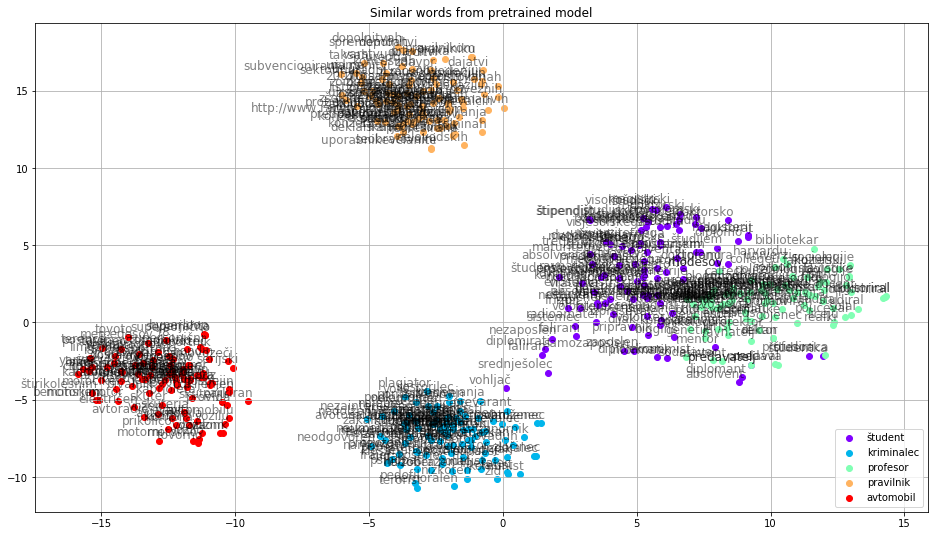

In [66]:
keys = ['študent','kriminalec', 'profesor', 'pravilnik', 'avtomobil'] #let us plot a graph of similarity clusters between these two words

Plotter.PlotGraphPreplexity50("Similar words from pretrained model",keys, "GraphImages/similar_words_pretrained_model.png")

In [67]:
#sim_words = model.wv.most_similar(positive='zapornik')  second way
sim_words = pre_trained_model.most_similar(positive=[pre_trained_model['zapornik']]) 
sim_words

[('zapornik', 0.9999999403953552),
 ('deportiranec', 0.724470853805542),
 ('kriminalec', 0.7136670351028442),
 ('interniranec', 0.7101718187332153),
 ('arkan', 0.7101715803146362),
 ('izbivšal', 0.694290041923523),
 ('posiljevalec', 0.6917643547058105),
 ('ovaduh', 0.6894434690475464),
 ('ropar', 0.6892540454864502),
 ('nacist', 0.6879022121429443)]

## Word2Vec (english google news pretrained)
### Link to the english pretrained models: https://code.google.com/archive/p/word2vec/

In [68]:
filename = 'SloTrainedModel/GoogleNews-vectors-negative300.bin'
pre_trained_model_english = gensim.models.KeyedVectors.load_word2vec_format('SloTrainedModel/GoogleNews-vectors-negative300.bin', binary=True)  

In [69]:
print(pre_trained_model_english['exam']) # lets see vector representation of word 'exam' with english model

[-7.66601562e-02  1.52343750e-01 -1.52343750e-01  1.16699219e-01
  2.85156250e-01  5.46875000e-02  1.08886719e-01 -3.35937500e-01
  5.81054688e-02  3.36914062e-02  2.02148438e-01 -2.25830078e-02
 -1.42578125e-01  1.71875000e-01  1.77734375e-01  3.76953125e-01
  4.19921875e-02 -2.59765625e-01 -1.53320312e-01 -3.63281250e-01
  4.86328125e-01 -1.37695312e-01 -2.44140625e-01 -6.98242188e-02
 -2.25585938e-01 -8.64257812e-02 -4.68750000e-01 -2.59765625e-01
 -1.61132812e-01  9.42382812e-02  1.53198242e-02 -3.97949219e-02
  5.61523438e-02 -3.76953125e-01 -2.53906250e-01  2.29492188e-01
  6.88476562e-02  9.57031250e-02  1.19140625e-01  1.01562500e-01
 -6.05468750e-01 -3.04687500e-01  1.73828125e-01 -2.50000000e-01
 -7.59887695e-03 -1.14257812e-01  4.00390625e-02  3.49609375e-01
 -3.04687500e-01  2.47070312e-01 -1.83593750e-01 -1.03149414e-02
 -3.63769531e-02  6.78710938e-02  2.65625000e-01  3.47656250e-01
  1.90429688e-01 -1.98242188e-01 -2.22656250e-01  3.56445312e-02
  4.61425781e-02 -1.74804

In [70]:
#we can see one problem, model was trained with stop words and special characters, they were not removed
words = list(pre_trained_model_english.vocab)
print(words[:100])

['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are', 'I', 'have', 'he', 'will', 'has', '####', 'his', 'an', 'this', 'or', 'their', 'who', 'they', 'but', '$', 'had', 'year', 'were', 'we', 'more', '###', 'up', 'been', 'you', 'its', 'one', 'about', 'would', 'which', 'out', 'can', 'It', 'all', 'also', 'two', 'after', 'first', 'He', 'do', 'time', 'than', 'when', 'We', 'over', 'last', 'new', 'other', 'her', 'people', 'into', 'In', 'our', 'there', 'A', 'she', 'could', 'just', 'years', 'some', 'U.S.', 'three', 'million', 'them', 'what', 'But', 'so', 'no', 'like', 'if', 'only', 'percent', 'get', 'did', 'him', 'game', 'back', 'because', 'now', '#.#', 'before']


In [71]:
#kraljica = (kralj - moški) + ženska
result = pre_trained_model_english.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118192911148071)]


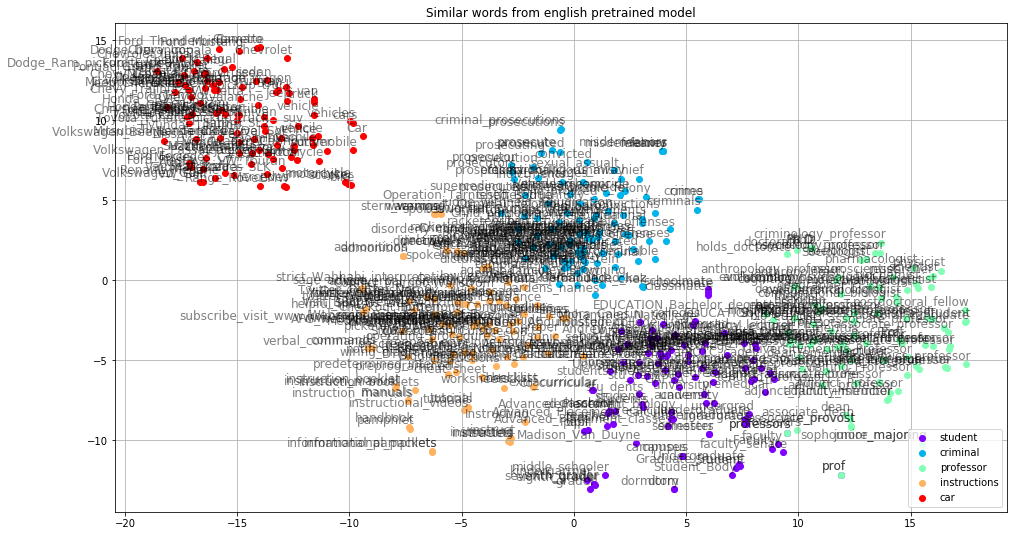

In [72]:
keys = ['student','criminal', 'professor', 'instructions', 'car'] #let us plot a graph of similarity clusters between these two words

Plotter.PlotGraphPreplexity50_english("Similar words from english pretrained model",keys, "GraphImages/similar_words_pretrained_model_english.png")
